In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from scipy import interp

# Fpr and Tpr of five-fold cross-validation of MAHN and four benchmark methods

In [2]:
fpr_MDBIRW=[[0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02083333, 0.02083333, 0.02083333,
       0.02083333, 0.02083333, 0.02083333, 0.02083333, 0.02777778,
       0.02777778, 0.04166667, 0.04166667, 0.05555556, 0.05555556,
       0.07638889, 0.07638889, 0.07638889, 0.08333333, 0.08333333,
       0.10416667, 0.10416667, 0.125     , 0.125     , 0.13194444,
       0.13194444, 0.13888889, 0.13888889, 0.14583333, 0.16666667,
       0.17361111, 0.17361111, 0.1875    , 0.20833333, 0.20833333,
       0.22222222, 0.22222222, 0.23611111, 0.23611111, 0.24305556,
       0.24305556, 0.25      , 0.25      , 0.25694444, 0.25694444,
       0.27083333, 0.27083333, 0.27777778, 0.27777778, 0.29166667,
       0.29166667, 0.30555556, 0.30555556, 0.32638889, 0.33333333,
       0.33333333, 0.34027778, 0.34027778, 0.34722222, 0.34722222,
       0.36805556, 0.36805556, 0.40277778, 0.41666667, 0.4375    ,
       0.4375    , 0.45138889, 0.47916667, 0.47916667, 0.52777778,
       0.52777778, 0.54861111, 0.54861111, 0.55555556, 0.55555556,
       0.56944444, 0.59722222, 0.63194444, 0.63194444, 0.75      ,
       0.75      , 0.76388889, 0.77777778, 0.8125    , 0.83333333,
       0.85416667, 0.86805556, 0.875     , 0.88888889, 0.92361111,
       0.9375    , 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00735294, 0.00735294, 0.00735294, 0.00735294,
       0.00735294, 0.00735294, 0.01470588, 0.01470588, 0.01470588,
       0.01470588, 0.02205882, 0.02205882, 0.02205882, 0.02205882,
       0.02205882, 0.02205882, 0.02941176, 0.02941176, 0.03676471,
       0.03676471, 0.04411765, 0.04411765, 0.05147059, 0.05147059,
       0.05882353, 0.05882353, 0.06617647, 0.06617647, 0.06617647,
       0.08823529, 0.08823529, 0.11764706, 0.11764706, 0.125     ,
       0.125     , 0.13970588, 0.13970588, 0.15441176, 0.15441176,
       0.16176471, 0.16176471, 0.17647059, 0.17647059, 0.20588235,
       0.20588235, 0.22058824, 0.22058824, 0.22794118, 0.24264706,
       0.25      , 0.25      , 0.25      , 0.27205882, 0.29411765,
       0.29411765, 0.30147059, 0.31617647, 0.32352941, 0.32352941,
       0.33823529, 0.34558824, 0.34558824, 0.36029412, 0.36029412,
       0.38235294, 0.39705882, 0.39705882, 0.41176471, 0.41176471,
       0.41911765, 0.41911765, 0.42647059, 0.42647059, 0.43382353,
       0.43382353, 0.46323529, 0.47794118, 0.47794118, 0.49264706,
       0.49264706, 0.54411765, 0.54411765, 0.58823529, 0.60294118,
       0.63235294, 0.63235294, 0.66911765, 0.69117647, 0.73529412,
       0.73529412, 0.86029412, 0.88235294, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00714286,
       0.00714286, 0.01428571, 0.01428571, 0.02142857, 0.02142857,
       0.03571429, 0.03571429, 0.04285714, 0.04285714, 0.06428571,
       0.06428571, 0.10714286, 0.13571429, 0.15      , 0.16428571,
       0.16428571, 0.17142857, 0.17142857, 0.17142857, 0.18571429,
       0.2       , 0.2       , 0.22142857, 0.22142857, 0.22857143,
       0.22857143, 0.23571429, 0.25      , 0.25      , 0.25714286,
       0.25714286, 0.28571429, 0.28571429, 0.29285714, 0.29285714,
       0.30714286, 0.30714286, 0.35      , 0.35      , 0.36428571,
       0.36428571, 0.39285714, 0.39285714, 0.4       , 0.4       ,
       0.40714286, 0.40714286, 0.46428571, 0.49285714, 0.5       ,
       0.51428571, 0.53571429, 0.55      , 0.67857143, 0.69285714,
       0.77142857, 0.79285714, 0.83571429, 0.85      , 1.        ],[0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00769231, 0.00769231, 0.00769231, 0.00769231,
       0.00769231, 0.01538462, 0.01538462, 0.01538462, 0.01538462,
       0.02307692, 0.02307692, 0.02307692, 0.03846154, 0.03846154,
       0.04615385, 0.04615385, 0.06153846, 0.06153846, 0.06923077,
       0.06923077, 0.07692308, 0.07692308, 0.07692308, 0.08461538,
       0.08461538, 0.1       , 0.1       , 0.10769231, 0.10769231,
       0.12307692, 0.14615385, 0.14615385, 0.16153846, 0.16153846,
       0.16923077, 0.16923077, 0.19230769, 0.19230769, 0.2       ,
       0.2       , 0.20769231, 0.20769231, 0.21538462, 0.21538462,
       0.22307692, 0.22307692, 0.23076923, 0.23076923, 0.23846154,
       0.23846154, 0.24615385, 0.24615385, 0.26153846, 0.28461538,
       0.28461538, 0.30769231, 0.32307692, 0.33076923, 0.33076923,
       0.39230769, 0.39230769, 0.41538462, 0.41538462, 0.43076923,
       0.43076923, 0.43846154, 0.43846154, 0.48461538, 0.48461538,
       0.49230769, 0.49230769, 0.55384615, 0.55384615, 0.56923077,
       0.56923077, 0.57692308, 0.6       , 0.6       , 0.63076923,
       0.63076923, 0.65384615, 0.66923077, 0.67692308, 0.67692308,
       0.69230769, 0.69230769, 0.74615385, 0.76153846, 0.91538462,
       0.93076923, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01428571, 0.01428571, 0.02142857, 0.02142857,
       0.02142857, 0.02142857, 0.02142857, 0.02857143, 0.02857143,
       0.02857143, 0.03571429, 0.03571429, 0.04285714, 0.04285714,
       0.05      , 0.05      , 0.05714286, 0.05714286, 0.08571429,
       0.08571429, 0.09285714, 0.09285714, 0.1       , 0.1       ,
       0.12857143, 0.14285714, 0.15714286, 0.15714286, 0.16428571,
       0.16428571, 0.17142857, 0.17142857, 0.17857143, 0.17857143,
       0.18571429, 0.18571429, 0.19285714, 0.19285714, 0.2       ,
       0.2       , 0.2       , 0.21428571, 0.21428571, 0.22142857,
       0.23571429, 0.23571429, 0.23571429, 0.23571429, 0.24285714,
       0.27142857, 0.27142857, 0.27857143, 0.27857143, 0.28571429,
       0.28571429, 0.29285714, 0.29285714, 0.3       , 0.3       ,
       0.32142857, 0.32142857, 0.34285714, 0.34285714, 0.35      ,
       0.35      , 0.36428571, 0.36428571, 0.37142857, 0.37142857,
       0.37857143, 0.37857143, 0.38571429, 0.38571429, 0.4       ,
       0.40714286, 0.40714286, 0.41428571, 0.41428571, 0.43571429,
       0.43571429, 0.44285714, 0.44285714, 0.47142857, 0.47142857,
       0.51428571, 0.51428571, 0.52857143, 0.55      , 0.57857143,
       0.57857143, 0.58571429, 0.60714286, 0.72142857, 0.74285714,
       0.82857143, 0.84285714, 0.89285714, 0.90714286, 0.95      ,
       0.96428571, 1.        ]]
tpr_MDBIRW= [[0.        , 0.06818182, 0.09848485, 0.24242424, 0.25757576,
       0.28030303, 0.29545455, 0.29545455, 0.31060606, 0.33333333,
       0.34848485, 0.37878788, 0.39393939, 0.42424242, 0.42424242,
       0.53030303, 0.53030303, 0.54545455, 0.54545455, 0.58333333,
       0.58333333, 0.59848485, 0.62121212, 0.62121212, 0.67424242,
       0.67424242, 0.68181818, 0.68181818, 0.6969697 , 0.6969697 ,
       0.71969697, 0.71969697, 0.77272727, 0.77272727, 0.77272727,
       0.77272727, 0.78030303, 0.78030303, 0.78030303, 0.78787879,
       0.78787879, 0.79545455, 0.79545455, 0.82575758, 0.82575758,
       0.84090909, 0.84090909, 0.84848485, 0.84848485, 0.85606061,
       0.85606061, 0.86363636, 0.86363636, 0.87121212, 0.87121212,
       0.87878788, 0.87878788, 0.89393939, 0.89393939, 0.89393939,
       0.90151515, 0.90151515, 0.90909091, 0.90909091, 0.92424242,
       0.92424242, 0.93181818, 0.93181818, 0.93181818, 0.93181818,
       0.9469697 , 0.9469697 , 0.9469697 , 0.95454545, 0.95454545,
       0.96212121, 0.96212121, 0.96969697, 0.96969697, 0.98484848,
       0.98484848, 0.98484848, 0.98484848, 0.99242424, 0.99242424,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ], [0.        , 0.08571429, 0.10714286, 0.11428571, 0.12857143,
       0.23571429, 0.23571429, 0.25      , 0.28571429, 0.29285714,
       0.33571429, 0.37142857, 0.37142857, 0.37857143, 0.39285714,
       0.40714286, 0.40714286, 0.50714286, 0.52142857, 0.54285714,
       0.55714286, 0.58571429, 0.58571429, 0.59285714, 0.59285714,
       0.66428571, 0.66428571, 0.7       , 0.7       , 0.70714286,
       0.70714286, 0.71428571, 0.71428571, 0.72857143, 0.74285714,
       0.74285714, 0.75      , 0.75      , 0.75714286, 0.75714286,
       0.76428571, 0.76428571, 0.77142857, 0.77142857, 0.77857143,
       0.77857143, 0.78571429, 0.78571429, 0.79285714, 0.79285714,
       0.80714286, 0.80714286, 0.81428571, 0.81428571, 0.81428571,
       0.81428571, 0.82142857, 0.83571429, 0.83571429, 0.83571429,
       0.84285714, 0.84285714, 0.84285714, 0.84285714, 0.86428571,
       0.86428571, 0.86428571, 0.87142857, 0.87142857, 0.87857143,
       0.87857143, 0.87857143, 0.9       , 0.9       , 0.92142857,
       0.92142857, 0.92857143, 0.92857143, 0.93571429, 0.93571429,
       0.94285714, 0.94285714, 0.94285714, 0.95      , 0.95      ,
       0.96428571, 0.96428571, 0.98571429, 0.98571429, 0.98571429,
       0.98571429, 0.99285714, 0.99285714, 0.99285714, 0.99285714,
       1.        , 1.        , 1.        , 1.        ], [0.        , 0.13970588, 0.16176471, 0.27205882, 0.29411765,
       0.33088235, 0.40441176, 0.41911765, 0.57352941, 0.57352941,
       0.58088235, 0.58088235, 0.60294118, 0.60294118, 0.63235294,
       0.63235294, 0.66176471, 0.66176471, 0.67647059, 0.67647059,
       0.77205882, 0.77205882, 0.77205882, 0.77205882, 0.77205882,
       0.78676471, 0.78676471, 0.80147059, 0.81617647, 0.81617647,
       0.81617647, 0.84558824, 0.84558824, 0.85294118, 0.85294118,
       0.86029412, 0.86029412, 0.86029412, 0.88235294, 0.88235294,
       0.90441176, 0.90441176, 0.91911765, 0.91911765, 0.94852941,
       0.94852941, 0.95588235, 0.95588235, 0.96323529, 0.96323529,
       0.97058824, 0.97058824, 0.98529412, 0.98529412, 0.99264706,
       0.99264706, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ],[0.        , 0.06164384, 0.06849315, 0.10273973, 0.13013699,
       0.2260274 , 0.2260274 , 0.24657534, 0.28767123, 0.32191781,
       0.33561644, 0.33561644, 0.39726027, 0.4109589 , 0.43150685,
       0.43150685, 0.5890411 , 0.60273973, 0.60273973, 0.63013699,
       0.63013699, 0.6369863 , 0.6369863 , 0.66438356, 0.66438356,
       0.69863014, 0.69863014, 0.71232877, 0.74657534, 0.74657534,
       0.75342466, 0.75342466, 0.76027397, 0.76027397, 0.76712329,
       0.76712329, 0.76712329, 0.7739726 , 0.7739726 , 0.78082192,
       0.78082192, 0.78767123, 0.78767123, 0.80136986, 0.80136986,
       0.81506849, 0.81506849, 0.82876712, 0.82876712, 0.83561644,
       0.83561644, 0.84246575, 0.84246575, 0.84931507, 0.84931507,
       0.85616438, 0.85616438, 0.8630137 , 0.8630137 , 0.8630137 ,
       0.87671233, 0.87671233, 0.87671233, 0.87671233, 0.90410959,
       0.90410959, 0.91780822, 0.91780822, 0.92465753, 0.92465753,
       0.93150685, 0.93150685, 0.93835616, 0.93835616, 0.94520548,
       0.94520548, 0.95205479, 0.95205479, 0.96575342, 0.96575342,
       0.97260274, 0.97260274, 0.97260274, 0.97945205, 0.97945205,
       0.98630137, 0.98630137, 0.98630137, 0.98630137, 0.99315068,
       0.99315068, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ], [0.        , 0.09558824, 0.10294118, 0.15441176, 0.16911765,
       0.23529412, 0.23529412, 0.27205882, 0.27205882, 0.30882353,
       0.35294118, 0.375     , 0.38235294, 0.38235294, 0.39705882,
       0.44852941, 0.44852941, 0.55882353, 0.55882353, 0.56617647,
       0.56617647, 0.59558824, 0.59558824, 0.60294118, 0.60294118,
       0.61029412, 0.61029412, 0.63235294, 0.63235294, 0.64705882,
       0.64705882, 0.64705882, 0.64705882, 0.65441176, 0.65441176,
       0.66176471, 0.66176471, 0.66911765, 0.66911765, 0.68382353,
       0.68382353, 0.71323529, 0.71323529, 0.72058824, 0.72058824,
       0.73529412, 0.74264706, 0.74264706, 0.75      , 0.75      ,
       0.75      , 0.76470588, 0.77941176, 0.78676471, 0.78676471,
       0.78676471, 0.79411765, 0.79411765, 0.80147059, 0.80147059,
       0.80882353, 0.80882353, 0.83088235, 0.83088235, 0.83823529,
       0.83823529, 0.84558824, 0.84558824, 0.85294118, 0.85294118,
       0.86764706, 0.86764706, 0.88235294, 0.88235294, 0.88970588,
       0.88970588, 0.89705882, 0.89705882, 0.92647059, 0.92647059,
       0.92647059, 0.93382353, 0.93382353, 0.94117647, 0.94117647,
       0.94852941, 0.94852941, 0.95588235, 0.95588235, 0.96323529,
       0.96323529, 0.99264706, 0.99264706, 0.99264706, 0.99264706,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ]]

fpr_RCNMF=[[0.        , 0.        , 0.        , 0.00675676, 0.00675676,
       0.01351351, 0.01351351, 0.05405405, 0.05405405, 0.08783784,
       0.08783784, 0.10810811, 0.10810811, 0.12162162, 0.12162162,
       0.14189189, 0.14189189, 0.25675676, 0.25675676, 0.33783784,
       0.33783784, 0.34459459, 0.34459459, 0.35810811, 0.35810811,
       0.5       , 0.5       , 0.53378378, 0.53378378, 0.5472973 ,
       0.5472973 , 0.61486486, 0.61486486, 0.67567568, 0.67567568,
       0.71621622, 0.71621622, 0.84459459, 0.84459459, 0.86486486,
       0.86486486, 1.        ], [0.        , 0.        , 0.        , 0.00769231, 0.00769231,
       0.01538462, 0.01538462, 0.03846154, 0.03846154, 0.05384615,
       0.05384615, 0.06923077, 0.06923077, 0.07692308, 0.07692308,
       0.1       , 0.1       , 0.11538462, 0.11538462, 0.13846154,
       0.13846154, 0.16923077, 0.16923077, 0.18461538, 0.18461538,
       0.19230769, 0.19230769, 0.2       , 0.2       , 0.20769231,
       0.20769231, 0.22307692, 0.22307692, 0.23076923, 0.23076923,
       0.26923077, 0.26923077, 0.32307692, 0.32307692, 0.40769231,
       0.40769231, 0.50769231, 0.50769231, 0.6       , 0.6       ,
       0.62307692, 0.62307692, 0.63846154, 0.63846154, 0.70769231,
       0.70769231, 0.82307692, 0.82307692, 0.88461538, 0.88461538,
       1.        , 1.        ], [0.        , 0.        , 0.        , 0.00869565, 0.00869565,
       0.0173913 , 0.0173913 , 0.02608696, 0.02608696, 0.03478261,
       0.03478261, 0.04347826, 0.04347826, 0.05217391, 0.05217391,
       0.06086957, 0.06086957, 0.06956522, 0.06956522, 0.07826087,
       0.07826087, 0.09565217, 0.09565217, 0.10434783, 0.10434783,
       0.13043478, 0.13043478, 0.15652174, 0.15652174, 0.16521739,
       0.16521739, 0.19130435, 0.19130435, 0.23478261, 0.23478261,
       0.24347826, 0.24347826, 0.25217391, 0.25217391, 0.26086957,
       0.26086957, 0.33043478, 0.33043478, 0.42608696, 0.42608696,
       0.44347826, 0.44347826, 0.46086957, 0.46086957, 0.46956522,
       0.46956522, 0.55652174, 0.55652174, 0.56521739, 0.56521739,
       0.6       , 0.6       , 0.63478261, 0.63478261, 0.68695652,
       0.68695652, 0.90434783, 0.90434783, 0.91304348, 0.91304348,
       1.        , 1.        ], [0.        , 0.        , 0.        , 0.00645161, 0.00645161,
       0.01290323, 0.01290323, 0.03225806, 0.03225806, 0.03870968,
       0.03870968, 0.0516129 , 0.0516129 , 0.07096774, 0.07096774,
       0.09032258, 0.09032258, 0.10967742, 0.10967742, 0.12258065,
       0.12258065, 0.14193548, 0.14193548, 0.16129032, 0.16129032,
       0.26451613, 0.26451613, 0.28387097, 0.28387097, 0.29032258,
       0.29032258, 0.30322581, 0.30322581, 0.36774194, 0.36774194,
       0.50322581, 0.50322581, 0.54193548, 0.54193548, 0.92258065,
       0.92258065, 0.92903226, 0.92903226, 0.98709677, 0.98709677,
       1.        ], [0.        , 0.        , 0.        , 0.00704225, 0.00704225,
       0.01408451, 0.01408451, 0.02112676, 0.02112676, 0.02816901,
       0.02816901, 0.03521127, 0.03521127, 0.0915493 , 0.0915493 ,
       0.1056338 , 0.1056338 , 0.11267606, 0.11267606, 0.12676056,
       0.12676056, 0.14084507, 0.14084507, 0.19014085, 0.19014085,
       0.26056338, 0.26056338, 0.32394366, 0.32394366, 0.33098592,
       0.33098592, 0.35211268, 0.35211268, 0.35915493, 0.35915493,
       0.47887324, 0.47887324, 0.53521127, 0.53521127, 0.54225352,
       0.54225352, 0.64084507, 0.64084507, 0.66197183, 0.66197183,
       0.83098592, 0.83098592, 0.87323944, 0.87323944, 0.92253521,
       0.92253521, 0.92957746, 0.92957746, 1.        , 1.        ]]
tpr_RCNMF=[[0.       , 0.0078125, 0.8125   , 0.8125   , 0.828125 , 0.828125 ,
       0.8515625, 0.8515625, 0.859375 , 0.859375 , 0.8828125, 0.8828125,
       0.890625 , 0.890625 , 0.8984375, 0.8984375, 0.90625  , 0.90625  ,
       0.9140625, 0.9140625, 0.921875 , 0.921875 , 0.9296875, 0.9296875,
       0.9375   , 0.9375   , 0.9453125, 0.9453125, 0.953125 , 0.953125 ,
       0.9609375, 0.9609375, 0.96875  , 0.96875  , 0.9765625, 0.9765625,
       0.984375 , 0.984375 , 0.9921875, 0.9921875, 1.       , 1.       ], [0.        , 0.00684932, 0.7739726 , 0.7739726 , 0.78767123,
       0.78767123, 0.80136986, 0.80136986, 0.81506849, 0.81506849,
       0.82876712, 0.82876712, 0.83561644, 0.83561644, 0.84246575,
       0.84246575, 0.84931507, 0.84931507, 0.85616438, 0.85616438,
       0.86986301, 0.86986301, 0.87671233, 0.87671233, 0.88356164,
       0.88356164, 0.89041096, 0.89041096, 0.89726027, 0.89726027,
       0.9109589 , 0.9109589 , 0.91780822, 0.91780822, 0.92465753,
       0.92465753, 0.93150685, 0.93150685, 0.93835616, 0.93835616,
       0.94520548, 0.94520548, 0.95205479, 0.95205479, 0.95890411,
       0.95890411, 0.96575342, 0.96575342, 0.97260274, 0.97260274,
       0.97945205, 0.97945205, 0.98630137, 0.98630137, 0.99315068,
       0.99315068, 1.        ], [0.        , 0.00621118, 0.72049689, 0.72049689, 0.7515528 ,
       0.7515528 , 0.77018634, 0.77018634, 0.77639752, 0.77639752,
       0.79503106, 0.79503106, 0.80124224, 0.80124224, 0.80745342,
       0.80745342, 0.8136646 , 0.8136646 , 0.82608696, 0.82608696,
       0.83229814, 0.83229814, 0.83850932, 0.83850932, 0.85093168,
       0.85093168, 0.85714286, 0.85714286, 0.86335404, 0.86335404,
       0.86956522, 0.86956522, 0.8757764 , 0.8757764 , 0.89440994,
       0.89440994, 0.90062112, 0.90062112, 0.9068323 , 0.9068323 ,
       0.91304348, 0.91304348, 0.91925466, 0.91925466, 0.92546584,
       0.92546584, 0.93167702, 0.93167702, 0.9378882 , 0.9378882 ,
       0.94409938, 0.94409938, 0.95031056, 0.95031056, 0.95652174,
       0.95652174, 0.96273292, 0.96273292, 0.9689441 , 0.9689441 ,
       0.98136646, 0.98136646, 0.98757764, 0.98757764, 0.99378882,
       0.99378882, 1.        ], [0.        , 0.00826446, 0.7768595 , 0.7768595 , 0.80991736,
       0.80991736, 0.81818182, 0.81818182, 0.83471074, 0.83471074,
       0.84297521, 0.84297521, 0.85123967, 0.85123967, 0.85950413,
       0.85950413, 0.8677686 , 0.8677686 , 0.88429752, 0.88429752,
       0.89256198, 0.89256198, 0.90082645, 0.90082645, 0.90909091,
       0.90909091, 0.91735537, 0.91735537, 0.92561983, 0.92561983,
       0.9338843 , 0.9338843 , 0.94214876, 0.94214876, 0.95041322,
       0.95041322, 0.95867769, 0.95867769, 0.96694215, 0.96694215,
       0.97520661, 0.97520661, 0.98347107, 0.98347107, 1.        ,
       1.        ], [0.        , 0.00746269, 0.71641791, 0.71641791, 0.74626866,
       0.74626866, 0.75373134, 0.75373134, 0.76119403, 0.76119403,
       0.76865672, 0.76865672, 0.7761194 , 0.7761194 , 0.79104478,
       0.79104478, 0.79850746, 0.79850746, 0.80597015, 0.80597015,
       0.84328358, 0.84328358, 0.85820896, 0.85820896, 0.87313433,
       0.87313433, 0.88059701, 0.88059701, 0.8880597 , 0.8880597 ,
       0.89552239, 0.89552239, 0.90298507, 0.90298507, 0.91791045,
       0.91791045, 0.93283582, 0.93283582, 0.94029851, 0.94029851,
       0.94776119, 0.94776119, 0.95522388, 0.95522388, 0.96268657,
       0.96268657, 0.97014925, 0.97014925, 0.97761194, 0.97761194,
       0.98507463, 0.98507463, 0.99253731, 0.99253731, 1.        ]]



fpr_MAHN=[[0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00373134, 0.00373134, 0.00746269, 0.00746269, 0.01119403,
       0.01119403, 0.01492537, 0.01492537, 0.01865672, 0.01865672,
       0.02238806, 0.02238806, 0.0261194 , 0.0261194 , 0.03358209,
       0.03358209, 0.04477612, 0.04477612, 0.04850746, 0.04850746,
       0.05223881, 0.05223881, 0.05970149, 0.05970149, 0.06716418,
       0.06716418, 0.08955224, 0.08955224, 0.09328358, 0.09328358,
       0.09701493, 0.09701493, 0.11940299, 0.11940299, 0.12313433,
       0.12313433, 0.12686567, 0.12686567, 0.14552239, 0.14552239,
       0.15671642, 0.15671642, 0.1641791 , 0.1641791 , 0.19029851,
       0.19029851, 0.19402985, 0.19402985, 0.20522388, 0.20522388,
       0.20895522, 0.20895522, 0.22014925, 0.22014925, 0.23507463,
       0.23507463, 0.31343284, 0.31343284, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00384615, 0.00769231, 0.00769231, 0.01538462,
       0.01538462, 0.02307692, 0.02307692, 0.02692308, 0.02692308,
       0.03076923, 0.03076923, 0.03461538, 0.03461538, 0.03846154,
       0.03846154, 0.04230769, 0.04230769, 0.04615385, 0.04615385,
       0.05      , 0.05      , 0.05384615, 0.05384615, 0.07692308,
       0.07692308, 0.08076923, 0.08076923, 0.08461538, 0.08461538,
       0.11538462, 0.11538462, 0.12307692, 0.12307692, 0.13846154,
       0.13846154, 0.14230769, 0.14230769, 0.16923077, 0.16923077,
       0.17307692, 0.17307692, 0.17692308, 0.17692308, 0.18076923,
       0.18076923, 0.19230769, 0.19230769, 0.2       , 0.2       ,
       0.20384615, 0.20384615, 0.21153846, 0.21153846, 0.21923077,
       0.21923077, 0.31153846, 0.31153846, 0.31923077, 0.31923077,
       1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00381679,
       0.00381679, 0.00763359, 0.00763359, 0.01526718, 0.01526718,
       0.02290076, 0.02290076, 0.02671756, 0.02671756, 0.03053435,
       0.03053435, 0.03816794, 0.03816794, 0.04198473, 0.04198473,
       0.04961832, 0.04961832, 0.05343511, 0.05343511, 0.05725191,
       0.05725191, 0.0610687 , 0.0610687 , 0.0648855 , 0.0648855 ,
       0.06870229, 0.06870229, 0.07251908, 0.07251908, 0.09160305,
       0.09160305, 0.09541985, 0.09541985, 0.10305344, 0.10305344,
       0.11450382, 0.11450382, 0.17175573, 0.17175573, 0.17938931,
       0.17938931, 0.19465649, 0.19465649, 0.23664122, 0.23664122,
       0.24427481, 0.24427481, 0.27480916, 0.27480916, 0.29389313,
       0.29389313, 0.29770992, 0.29770992, 0.30916031, 0.30916031,
       0.36641221, 0.36641221, 0.51526718, 0.51526718, 0.57251908,
       0.57251908, 0.72900763, 0.72900763, 0.74045802, 0.74045802,
       0.75572519, 0.75572519, 0.77862595, 0.77862595, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00328947, 0.00328947, 0.00657895, 0.00657895, 0.00986842,
       0.00986842, 0.01315789, 0.01315789, 0.01644737, 0.01644737,
       0.02960526, 0.02960526, 0.03289474, 0.03289474, 0.03618421,
       0.03618421, 0.03947368, 0.03947368, 0.04276316, 0.04276316,
       0.04934211, 0.04934211, 0.0625    , 0.0625    , 0.06907895,
       0.06907895, 0.07565789, 0.07565789, 0.08552632, 0.08552632,
       0.09539474, 0.09539474, 0.09868421, 0.09868421, 0.10197368,
       0.10197368, 0.10855263, 0.10855263, 0.125     , 0.125     ,
       0.12828947, 0.12828947, 0.18421053, 0.18421053, 0.19078947,
       0.19078947, 0.20394737, 0.20394737, 0.21710526, 0.21710526,
       0.23026316, 0.23026316, 0.26973684, 0.26973684, 0.27302632,
       0.27302632, 0.29276316, 0.29276316, 0.30592105, 0.30592105,
       0.38486842, 0.38486842, 0.40789474, 0.40789474, 0.45394737,
       0.45394737, 0.45723684, 0.45723684, 0.62828947, 0.62828947,
       0.65131579, 0.65131579, 1.        ], [0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0034965 , 0.0034965 , 0.00699301,
       0.00699301, 0.01048951, 0.01048951, 0.01398601, 0.01398601,
       0.01748252, 0.01748252, 0.02097902, 0.02097902, 0.03146853,
       0.03146853, 0.03496503, 0.03496503, 0.03846154, 0.03846154,
       0.04195804, 0.04195804, 0.04545455, 0.04545455, 0.05244755,
       0.05244755, 0.05594406, 0.05594406, 0.06643357, 0.06643357,
       0.07692308, 0.07692308, 0.08391608, 0.08391608, 0.22027972,
       0.22027972, 0.22377622, 0.22377622, 0.30769231, 0.30769231,
       0.31118881, 0.31118881, 1.        ]]
tpr_MAHN= [[0.        , 0.00352113, 0.01056338, 0.07042254, 0.07746479,
       0.26408451, 0.27112676, 0.37676056, 0.38380282, 0.63732394,
       0.63732394, 0.65492958, 0.65492958, 0.6584507 , 0.6584507 ,
       0.69366197, 0.69366197, 0.74647887, 0.74647887, 0.76056338,
       0.76056338, 0.83802817, 0.83802817, 0.84507042, 0.84507042,
       0.84859155, 0.84859155, 0.85211268, 0.85211268, 0.8556338 ,
       0.8556338 , 0.86619718, 0.86619718, 0.9084507 , 0.9084507 ,
       0.91549296, 0.91549296, 0.92957746, 0.92957746, 0.93661972,
       0.93661972, 0.94366197, 0.94366197, 0.9471831 , 0.9471831 ,
       0.95070423, 0.95070423, 0.95422535, 0.95422535, 0.96126761,
       0.96126761, 0.96478873, 0.96478873, 0.96830986, 0.96830986,
       0.97183099, 0.97183099, 0.97535211, 0.97535211, 0.97887324,
       0.97887324, 0.98591549, 0.98591549, 0.98943662, 0.98943662,
       0.99295775, 0.99295775, 1.        , 1.        ], [0.        , 0.00342466, 0.01027397, 0.05821918, 0.06506849,
       0.10958904, 0.1130137 , 0.1130137 , 0.5890411 , 0.5890411 ,
       0.59931507, 0.59931507, 0.73630137, 0.73630137, 0.73972603,
       0.73972603, 0.75      , 0.75      , 0.77054795, 0.77054795,
       0.79109589, 0.79109589, 0.80479452, 0.80479452, 0.85616438,
       0.85616438, 0.8630137 , 0.8630137 , 0.89041096, 0.89041096,
       0.9109589 , 0.9109589 , 0.92123288, 0.92123288, 0.93150685,
       0.93150685, 0.93493151, 0.93493151, 0.94520548, 0.94520548,
       0.94863014, 0.94863014, 0.95547945, 0.95547945, 0.95890411,
       0.95890411, 0.96575342, 0.96575342, 0.96917808, 0.96917808,
       0.9760274 , 0.9760274 , 0.97945205, 0.97945205, 0.98287671,
       0.98287671, 0.98630137, 0.98630137, 0.98972603, 0.98972603,
       0.99315068, 0.99315068, 0.99657534, 0.99657534, 1.        ,
       1.        ], [0.        , 0.00344828, 0.0137931 , 0.02068966, 0.12068966,
       0.12758621, 0.48965517, 0.49655172, 0.77241379, 0.77241379,
       0.77586207, 0.77586207, 0.77931034, 0.77931034, 0.78275862,
       0.78275862, 0.7862069 , 0.7862069 , 0.8       , 0.8       ,
       0.83793103, 0.83793103, 0.84482759, 0.84482759, 0.84827586,
       0.84827586, 0.85172414, 0.85172414, 0.85517241, 0.85517241,
       0.86551724, 0.86551724, 0.87586207, 0.87586207, 0.89310345,
       0.89310345, 0.90689655, 0.90689655, 0.91034483, 0.91034483,
       0.91724138, 0.91724138, 0.92413793, 0.92413793, 0.93103448,
       0.93103448, 0.93793103, 0.93793103, 0.94137931, 0.94137931,
       0.94827586, 0.94827586, 0.95172414, 0.95172414, 0.95517241,
       0.95517241, 0.95862069, 0.95862069, 0.96206897, 0.96206897,
       0.96551724, 0.96551724, 0.96896552, 0.96896552, 0.97241379,
       0.97241379, 0.97931034, 0.97931034, 0.98275862, 0.98275862,
       0.9862069 , 0.9862069 , 0.98965517, 0.98965517, 0.99310345,
       0.99310345, 0.99655172, 0.99655172, 1.        , 1.        ], [0.        , 0.00403226, 0.25      , 0.25806452, 0.62903226,
       0.62903226, 0.70564516, 0.70564516, 0.77016129, 0.77016129,
       0.78225806, 0.78225806, 0.78629032, 0.78629032, 0.79435484,
       0.79435484, 0.81451613, 0.81451613, 0.84677419, 0.84677419,
       0.85080645, 0.85080645, 0.85483871, 0.85483871, 0.85887097,
       0.85887097, 0.87096774, 0.87096774, 0.88306452, 0.88306452,
       0.88709677, 0.88709677, 0.89112903, 0.89112903, 0.90322581,
       0.90322581, 0.90725806, 0.90725806, 0.91532258, 0.91532258,
       0.91935484, 0.91935484, 0.9233871 , 0.9233871 , 0.92741935,
       0.92741935, 0.93548387, 0.93548387, 0.93951613, 0.93951613,
       0.94354839, 0.94354839, 0.94758065, 0.94758065, 0.95564516,
       0.95564516, 0.95967742, 0.95967742, 0.96370968, 0.96370968,
       0.96774194, 0.96774194, 0.97177419, 0.97177419, 0.97580645,
       0.97580645, 0.97983871, 0.97983871, 0.98387097, 0.98387097,
       0.98790323, 0.98790323, 0.99193548, 0.99193548, 0.99596774,
       0.99596774, 1.        , 1.        ], [0.        , 0.0037594 , 0.0112782 , 0.04135338, 0.05263158,
       0.06766917, 0.07518797, 0.10902256, 0.11654135, 0.21052632,
       0.21804511, 0.66917293, 0.66917293, 0.68796992, 0.68796992,
       0.72932331, 0.72932331, 0.7443609 , 0.7443609 , 0.7481203 ,
       0.7481203 , 0.76315789, 0.76315789, 0.76691729, 0.76691729,
       0.77067669, 0.77067669, 0.81578947, 0.81578947, 0.83458647,
       0.83458647, 0.89473684, 0.89473684, 0.91353383, 0.91353383,
       0.92857143, 0.92857143, 0.94736842, 0.94736842, 0.95112782,
       0.95112782, 0.96992481, 0.96992481, 0.98496241, 0.98496241,
       0.9887218 , 0.9887218 , 0.9924812 , 0.9924812 , 0.9962406 ,
       0.9962406 , 1.        , 1.        ]]


fpr_DWRF= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011240164855751217, 0.011240164855751217, 0.011240164855751217, 0.011240164855751217, 0.011240164855751217, 0.011240164855751217, 0.011614837017609592, 0.011614837017609592, 0.011614837017609592, 0.011614837017609592, 0.011614837017609592, 0.011614837017609592, 0.012364181341326339, 0.012738853503184714, 0.012738853503184714, 0.012738853503184714, 0.013113525665043087, 0.013113525665043087, 0.013113525665043087, 0.013113525665043087, 0.013113525665043087, 0.013113525665043087, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013488197826901461, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.013862869988759834, 0.01423754215061821, 0.015736230798051705, 0.015736230798051705, 0.015736230798051705, 0.015736230798051705, 0.015736230798051705, 0.015736230798051705, 0.015736230798051705, 0.01611090295991008, 0.01611090295991008, 0.01611090295991008, 0.01611090295991008, 0.01611090295991008, 0.01611090295991008, 0.016485575121768452, 0.016485575121768452, 0.016485575121768452, 0.016485575121768452, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.016860247283626825, 0.017234919445485202, 0.017234919445485202, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.017609591607343576, 0.01798426376920195, 0.01798426376920195, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.018733608092918696, 0.01910828025477707, 0.01910828025477707, 0.019482952416635443, 0.019482952416635443, 0.019482952416635443, 0.019482952416635443, 0.01985762457849382, 0.01985762457849382, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020232296740352193, 0.020606968902210566, 0.020606968902210566, 0.020606968902210566, 0.020606968902210566, 0.020606968902210566, 0.020606968902210566, 0.020606968902210566, 0.020606968902210566, 0.02098164106406894, 0.02098164106406894, 0.021730985387785687, 0.021730985387785687, 0.02210565754964406, 0.02210565754964406, 0.02285500187336081, 0.02285500187336081, 0.023229674035219184, 0.024728362682652678, 0.024728362682652678, 0.02510303484451105, 0.02510303484451105, 0.02510303484451105, 0.025477707006369428, 0.025477707006369428, 0.025477707006369428, 0.0258523791682278, 0.0258523791682278, 0.026227051330086175, 0.026227051330086175, 0.026227051330086175, 0.026227051330086175, 0.026227051330086175, 0.026227051330086175, 0.026976395653802922, 0.026976395653802922, 0.026976395653802922, 0.02772573997751967, 0.02772573997751967, 0.028100412139378046, 0.028100412139378046, 0.029224428624953166, 0.029224428624953166, 0.02959910078681154, 0.02959910078681154, 0.030348445110528286, 0.030348445110528286, 0.030723117272386663, 0.030723117272386663, 0.031097789434245036, 0.031097789434245036, 0.031097789434245036, 0.031097789434245036, 0.03147246159610341, 0.03147246159610341, 0.03184713375796178, 0.03184713375796178, 0.03222180591982016, 0.03222180591982016, 0.03259647808167853, 0.03259647808167853, 0.03259647808167853, 0.032971150243536904, 0.032971150243536904, 0.03334582240539528, 0.03334582240539528, 0.03372049456725365, 0.03372049456725365, 0.034095166729112024, 0.034095166729112024, 0.034095166729112024, 0.034469838890970404, 0.034469838890970404, 0.03484451105282878, 0.03484451105282878, 0.03521918321468715, 0.03521918321468715, 0.035593855376545525, 0.035593855376545525, 0.035593855376545525, 0.0359685275384039, 0.036717871862120645, 0.03709254402397902, 0.03709254402397902, 0.037841888347695765, 0.037841888347695765, 0.03821656050955414, 0.03821656050955414, 0.03859123267141251, 0.03859123267141251, 0.038965904833270885, 0.03934057699512926, 0.03934057699512926, 0.03971524915698764, 0.03971524915698764, 0.040464593480704386, 0.040464593480704386, 0.040464593480704386, 0.040464593480704386, 0.04083926564256276, 0.04083926564256276, 0.04121393780442113, 0.04121393780442113, 0.041588609966279506, 0.041588609966279506, 0.04196328212813788, 0.04196328212813788, 0.04196328212813788, 0.04196328212813788, 0.04271262645185463, 0.04271262645185463, 0.04383664293742975, 0.04383664293742975, 0.04421131509928812, 0.04421131509928812, 0.044585987261146494, 0.044585987261146494, 0.04496065942300487, 0.04496065942300487, 0.04533533158486325, 0.04533533158486325, 0.04571000374672162, 0.04571000374672162, 0.04645934807043837, 0.04645934807043837, 0.04683402023229674, 0.04683402023229674, 0.047208692394155115, 0.047208692394155115, 0.04758336455601349, 0.04758336455601349, 0.04795803671787186, 0.04795803671787186, 0.048332708879730235, 0.048332708879730235, 0.04908205320344698, 0.04908205320344698, 0.049456725365305355, 0.049456725365305355, 0.0502060696890221, 0.0502060696890221, 0.05133008617459723, 0.05133008617459723, 0.0517047583364556, 0.0517047583364556, 0.052079430498313976, 0.052079430498313976, 0.05245410266017235, 0.05245410266017235, 0.05282877482203072, 0.05282877482203072, 0.0532034469838891, 0.0532034469838891, 0.05432746346946422, 0.05432746346946422, 0.05620082427875609, 0.05620082427875609, 0.056575496440614464, 0.056575496440614464, 0.05695016860247284, 0.05695016860247284, 0.05695016860247284, 0.05695016860247284, 0.057699512926189585, 0.057699512926189585, 0.05807418508804796, 0.05807418508804796, 0.058823529411764705, 0.058823529411764705, 0.05919820157362308, 0.05919820157362308, 0.05957287373548145, 0.05957287373548145, 0.059947545897339825, 0.059947545897339825, 0.06107156238291495, 0.06107156238291495, 0.061446234544773326, 0.061446234544773326, 0.0618209067066317, 0.06257025103034844, 0.06294492319220682, 0.06294492319220682, 0.06406893967778195, 0.06406893967778195, 0.06444361183964031, 0.06444361183964031, 0.0648182840014987, 0.0648182840014987, 0.06519295616335706, 0.06519295616335706, 0.06556762832521544, 0.06556762832521544, 0.06631697264893219, 0.06631697264893219, 0.06669164481079055, 0.06669164481079055, 0.06669164481079055, 0.06669164481079055, 0.06706631697264893, 0.06706631697264893, 0.06781566129636568, 0.06781566129636568, 0.06819033345822405, 0.06819033345822405, 0.06856500562008243, 0.06856500562008243, 0.06856500562008243, 0.06893967778194081, 0.06893967778194081, 0.06968902210565756, 0.06968902210565756, 0.07006369426751592, 0.07006369426751592, 0.0704383664293743, 0.07156238291494942, 0.0719370550768078, 0.0719370550768078, 0.07231172723866616, 0.07231172723866616, 0.07268639940052454, 0.07268639940052454, 0.07306107156238291, 0.07306107156238291, 0.07343574372424129, 0.07343574372424129, 0.07381041588609966, 0.07381041588609966, 0.07381041588609966, 0.07493443237167478, 0.07493443237167478, 0.07568377669539153, 0.07568377669539153, 0.07568377669539153, 0.07605844885724991, 0.07605844885724991, 0.0790558261521169, 0.0790558261521169, 0.07943049831397528, 0.07943049831397528, 0.07980517047583364, 0.07980517047583364, 0.08092918696140877, 0.08092918696140877, 0.08167853128512552, 0.08167853128512552, 0.08205320344698389, 0.08205320344698389, 0.08317721993255901, 0.08317721993255901, 0.08355189209441738, 0.08355189209441738, 0.08392656425627576, 0.08392656425627576, 0.08430123641813413, 0.08430123641813413, 0.0846759085799925, 0.0846759085799925, 0.08505058074185089, 0.08505058074185089, 0.08542525290370925, 0.08542525290370925, 0.08579992506556763, 0.08579992506556763, 0.08654926938928438, 0.08654926938928438, 0.08692394155114275, 0.08692394155114275, 0.08729861371300113, 0.08729861371300113, 0.08804795803671787, 0.08804795803671787, 0.08954664668415137, 0.08954664668415137, 0.08992131884600973, 0.08992131884600973, 0.09179467965530161, 0.09179467965530161, 0.09254402397901836, 0.09254402397901836, 0.09291869614087674, 0.09291869614087674, 0.0932933683027351, 0.0932933683027351, 0.09404271262645185, 0.09404271262645185, 0.0947920569501686, 0.0947920569501686, 0.09516672911202698, 0.09516672911202698, 0.0962907455976021, 0.0962907455976021, 0.09704008992131885, 0.09704008992131885, 0.09741476208317722, 0.09741476208317722, 0.09816410640689396, 0.09816410640689396, 0.09853877856875234, 0.09853877856875234, 0.09891345073061071, 0.09891345073061071, 0.09928812289246909, 0.09928812289246909, 0.09966279505432746, 0.09966279505432746, 0.10003746721618584, 0.10003746721618584, 0.10078681153990258, 0.10078681153990258, 0.10191082802547771, 0.10191082802547771, 0.10228550018733608, 0.10228550018733608, 0.10266017234919446, 0.10266017234919446, 0.10303484451105283, 0.10303484451105283, 0.1034095166729112, 0.1034095166729112, 0.10378418883476957, 0.10378418883476957, 0.1049082053203447, 0.1049082053203447, 0.1049082053203447, 0.10678156612963657, 0.10678156612963657, 0.10753091045335332, 0.10753091045335332, 0.10753091045335332, 0.10828025477707007, 0.10828025477707007, 0.10902959910078681, 0.10902959910078681, 0.10977894342450356, 0.10977894342450356, 0.11052828774822031, 0.11052828774822031, 0.11090295991007867, 0.11090295991007867, 0.11315099288122893, 0.11315099288122893, 0.11427500936680404, 0.11427500936680404, 0.11464968152866242, 0.11464968152866242, 0.11502435369052079, 0.11502435369052079, 0.11539902585237917, 0.11689771449981266, 0.11764705882352941, 0.11764705882352941, 0.11802173098538779, 0.11802173098538779, 0.11877107530910454, 0.11877107530910454, 0.11989509179467965, 0.11989509179467965, 0.12026976395653803, 0.12026976395653803, 0.1221431247658299, 0.1221431247658299, 0.12251779692768827, 0.12251779692768827, 0.1236418134132634, 0.1236418134132634, 0.12401648557512177, 0.12401648557512177, 0.12476582989883851, 0.12476582989883851, 0.12514050206069688, 0.12514050206069688, 0.12551517422255526, 0.12551517422255526, 0.1281378793555639, 0.1281378793555639, 0.129261895841139, 0.129261895841139, 0.1307605844885725, 0.1307605844885725, 0.13263394529786438, 0.13263394529786438, 0.13525665043087298, 0.13713001124016486, 0.13787935556388162, 0.13787935556388162, 0.13825402772573997, 0.13825402772573997, 0.13900337204945673, 0.13900337204945673, 0.13975271637317346, 0.13975271637317346, 0.14050206069689022, 0.14162607718246534, 0.14162607718246534, 0.14275009366804045, 0.14275009366804045, 0.14462345447733232, 0.14462345447733232, 0.14612214312476582, 0.14612214312476582, 0.14687148744848258, 0.14687148744848258, 0.14724615961034096, 0.14724615961034096, 0.14837017609591607, 0.14837017609591607, 0.14874484825777445, 0.14874484825777445, 0.14911952041963283, 0.14911952041963283, 0.14911952041963283, 0.14986886474334957, 0.14986886474334957, 0.15061820906706633, 0.15061820906706633, 0.15211689771449982, 0.15211689771449982, 0.15286624203821655, 0.15286624203821655, 0.15324091420007493, 0.15324091420007493, 0.1539902585237917, 0.1539902585237917, 0.15473960284750843, 0.15473960284750843, 0.15586361933308354, 0.15586361933308354, 0.15623829149494192, 0.15623829149494192, 0.1581116523042338, 0.1581116523042338, 0.1622330460846759, 0.1622330460846759, 0.16260771824653428, 0.16260771824653428, 0.1637317347321094, 0.1637317347321094, 0.16410640689396777, 0.16410640689396777, 0.16485575121768453, 0.16485575121768453, 0.16635443986511803, 0.16635443986511803, 0.16635443986511803, 0.1682278006744099, 0.1682278006744099, 0.16860247283626825, 0.16860247283626825, 0.16897714499812663, 0.169351817159985, 0.169351817159985, 0.17159985013113527, 0.17159985013113527, 0.172349194454852, 0.172349194454852, 0.17272386661671038, 0.17309853877856876, 0.1734732109404271, 0.1738478831022855, 0.1738478831022855, 0.17459722742600225, 0.17459722742600225, 0.175346571749719, 0.175346571749719, 0.17572124391157737, 0.17572124391157737, 0.17684526039715248, 0.17684526039715248, 0.17871862120644436, 0.17871862120644436, 0.17909329336830274, 0.17909329336830274, 0.18021730985387785, 0.18021730985387785, 0.18059198201573623, 0.18059198201573623, 0.18209067066316972, 0.18284001498688648, 0.1839640314724616, 0.1839640314724616, 0.1854627201198951, 0.1854627201198951, 0.18583739228175347, 0.18583739228175347, 0.18621206444361185, 0.18621206444361185, 0.18771075309104535, 0.18771075309104535, 0.1880854252529037, 0.1880854252529037, 0.18846009741476208, 0.18846009741476208, 0.18846009741476208, 0.19183214687148745, 0.19183214687148745, 0.19220681903334583, 0.19220681903334583, 0.1925814911952042, 0.1925814911952042, 0.19370550768077932, 0.19370550768077932, 0.1940801798426377, 0.1940801798426377, 0.1970775571375047, 0.1970775571375047, 0.19782690146122142, 0.19782690146122142, 0.20044960659423006, 0.20044960659423006, 0.2008242787560884, 0.2011989509179468, 0.20157362307980517, 0.20157362307980517, 0.20457100037467216, 0.20457100037467216, 0.20532034469838892, 0.20532034469838892, 0.2071937055076808, 0.2071937055076808, 0.20906706631697264, 0.20906706631697264, 0.20944173847883102, 0.20944173847883102, 0.2113150992881229, 0.2113150992881229, 0.212439115773698, 0.212439115773698, 0.21618583739228175, 0.21618583739228175, 0.21693518171599852, 0.21693518171599852, 0.22030723117272386, 0.22030723117272386, 0.22180591982015735, 0.22180591982015735, 0.22442862495316598, 0.22442862495316598, 0.22480329711502436, 0.22480329711502436, 0.23117272386661672, 0.23117272386661672, 0.23154739602847507, 0.23154739602847507, 0.23192206819033345, 0.23192206819033345, 0.2330460846759086, 0.2330460846759086, 0.23342075683776695, 0.23342075683776695, 0.2345447733233421, 0.2345447733233421, 0.2356687898089172, 0.23641813413263393, 0.23641813413263393, 0.23679280629449231, 0.23679280629449231, 0.23791682278006743, 0.23791682278006743, 0.2397901835893593, 0.2397901835893593, 0.24353690520794305, 0.24353690520794305, 0.24503559385537654, 0.24503559385537654, 0.24803297115024353, 0.24803297115024353, 0.2499063319595354, 0.2499063319595354, 0.255526414387411, 0.255526414387411, 0.25814911952041963, 0.25814911952041963, 0.26039715249156986, 0.26039715249156986, 0.26227051330086176, 0.26227051330086176, 0.264518546272012, 0.264518546272012, 0.26564256275758713, 0.26564256275758713, 0.2660172349194455, 0.2660172349194455, 0.2671412514050206, 0.2671412514050206, 0.2697639565380292, 0.2697639565380292, 0.27051330086174596, 0.27051330086174596, 0.2720119895091795, 0.2720119895091795, 0.27388535031847133, 0.27388535031847133, 0.2750093668040465, 0.2750093668040465, 0.27538403896590485, 0.27538403896590485, 0.27575871112776323, 0.27575871112776323, 0.27838141626077184, 0.27838141626077184, 0.27913076058448855, 0.27913076058448855, 0.28400149868864744, 0.28400149868864744, 0.2847508430123642, 0.2847508430123642, 0.2851255151742226, 0.2851255151742226, 0.28812289246908956, 0.28812289246908956, 0.28962158111652303, 0.28962158111652303, 0.29074559760209817, 0.29074559760209817, 0.29149494192581493, 0.29149494192581493, 0.29224428624953164, 0.2929936305732484, 0.2929936305732484, 0.2944923192206819, 0.2944923192206819, 0.2948669913825403, 0.2948669913825403, 0.2952416635443986, 0.2952416635443986, 0.29823904083926567, 0.29823904083926567, 0.29936305732484075, 0.29936305732484075, 0.3001124016485575, 0.3001124016485575, 0.3008617459722743, 0.3008617459722743, 0.30198576245784936, 0.30198576245784936, 0.3031097789434245, 0.3031097789434245, 0.30423379542899964, 0.30535781191457473, 0.307605844885725, 0.307605844885725, 0.3091045335331585, 0.3091045335331585, 0.30985387785687524, 0.30985387785687524, 0.3102285500187336, 0.3102285500187336, 0.310603222180592, 0.310603222180592, 0.310603222180592, 0.3117272386661671, 0.31247658298988384, 0.3128512551517422, 0.3128512551517422, 0.31734732109404273, 0.31809666541775944, 0.31997002622705134, 0.31997002622705134, 0.3237167478456351, 0.3237167478456351, 0.32409142000749347, 0.32409142000749347, 0.3248407643312102, 0.3248407643312102, 0.3293368302735107, 0.3293368302735107, 0.33083551892094415, 0.33083551892094415, 0.33533158486324466, 0.33533158486324466, 0.33570625702510304, 0.3360809291869614, 0.3364556013488198, 0.3364556013488198, 0.3368302735106782, 0.3368302735106782, 0.3375796178343949, 0.3375796178343949, 0.3390783064818284, 0.3390783064818284, 0.3405769951292619, 0.3405769951292619, 0.34282502810041215, 0.34282502810041215, 0.34319970026227054, 0.34319970026227054, 0.34544773323342076, 0.3461970775571375, 0.3473210940427126, 0.34807043836642937, 0.34844511052828775, 0.3491944548520045, 0.3495691270138629, 0.3495691270138629, 0.35406519295616334, 0.35406519295616334, 0.3544398651180217, 0.3551892094417385, 0.3551892094417385, 0.35556388160359687, 0.35556388160359687, 0.35593855376545525, 0.35668789808917195, 0.3581865867366055, 0.3581865867366055, 0.35893593106032223, 0.35893593106032223, 0.35968527538403894, 0.3604346197077557, 0.3619333083551892, 0.3619333083551892, 0.362682652678906, 0.36380666916448107, 0.3645560134881978, 0.36568002997377297, 0.36568002997377297, 0.3683027351067816, 0.36905207943049834, 0.3705507680779318, 0.3705507680779318, 0.37130011240164856, 0.37130011240164856, 0.37167478456350694, 0.37167478456350694, 0.3720494567253653, 0.3720494567253653, 0.37467216185837393, 0.37467216185837393, 0.3780442113150993, 0.3780442113150993, 0.37879355563881606, 0.37879355563881606, 0.37991757212439115, 0.37991757212439115, 0.38254027725739975, 0.38254027725739975, 0.38553765455226674, 0.38553765455226674, 0.3862869988759835, 0.3862869988759835, 0.39265642562757586, 0.39265642562757586, 0.39452978643686776, 0.39452978643686776, 0.39715249156987636, 0.39715249156987636, 0.3982765080554515, 0.3982765080554515, 0.39977519670288497, 0.39977519670288497, 0.40052454102660173, 0.40052454102660173, 0.40314724615961034, 0.40314724615961034, 0.4068939677781941, 0.4068939677781941, 0.40764331210191085, 0.40764331210191085, 0.4091420007493443, 0.4091420007493443, 0.41064068939677784, 0.41064068939677784, 0.4110153615586362, 0.41288872236792806, 0.4200074934432372, 0.42075683776695394, 0.42075683776695394, 0.42113150992881226, 0.42113150992881226, 0.42300487073810417, 0.4237542150618209, 0.424878231547396, 0.4267515923566879, 0.4327463469464219, 0.43349569127013865, 0.43424503559385536, 0.43424503559385536, 0.43649306856500564, 0.43724241288872234, 0.4376170850505807, 0.4376170850505807, 0.43874110153615586, 0.43874110153615586, 0.43911577369801424, 0.439865118021731, 0.4402397901835894, 0.4402397901835894, 0.4409891345073061, 0.44173847883102285, 0.44473585612588984, 0.44473585612588984, 0.44660921693518174, 0.44735856125889845, 0.4511052828774822, 0.4511052828774822, 0.4541026601723492, 0.4541026601723492, 0.45447733233420756, 0.4552266766579243, 0.45710003746721617, 0.45784938179093293, 0.45784938179093293, 0.46309479205695014, 0.4638441363806669, 0.4664668415136755, 0.4672161858373923, 0.4694642188085425, 0.47021356313225926, 0.4743349569127014, 0.4743349569127014, 0.4840764331210191, 0.4840764331210191, 0.48594979393031096, 0.4866991382540277, 0.4870738104158861, 0.4870738104158861, 0.4923192206819033, 0.4945672536530536, 0.49868864743349567, 0.49943799175721243, 0.5001873360809291, 0.5009366804046459, 0.5009366804046459, 0.5061820906706632, 0.5073061071562383, 0.5088047958036718, 0.5099288122892469, 0.511052828774822, 0.5125515174222556, 0.5136755339078306, 0.514050206069689, 0.514050206069689, 0.5196702884975646, 0.5204196328212813, 0.5207943049831397, 0.5207943049831397, 0.5215436493068565, 0.5222929936305732, 0.5226676657924316, 0.5226676657924316, 0.5264143874110153, 0.5264143874110153, 0.5286624203821656, 0.5294117647058824, 0.5294117647058824, 0.5301611090295991, 0.5339078306481828, 0.5346571749718996, 0.535031847133758, 0.535031847133758, 0.5354065192956163, 0.5361558636193331, 0.5365305357811915, 0.5365305357811915, 0.5369052079430499, 0.5376545522667666, 0.5387785687523416, 0.5410266017234919, 0.5414012738853503, 0.5443986511802174, 0.5462720119895091, 0.5470213563132259, 0.5477707006369427, 0.5485200449606594, 0.5488947171225178, 0.5503934057699513, 0.5522667665792431, 0.5530161109029599, 0.5530161109029599, 0.5537654552266766, 0.5537654552266766, 0.5537654552266766, 0.5552641438741102, 0.5552641438741102, 0.5556388160359685, 0.5578868490071188, 0.5578868490071188, 0.5586361933308355, 0.5593855376545522, 0.5608842263019858, 0.5612588984638441, 0.5620082427875609, 0.5623829149494193, 0.563132259273136, 0.5676283252154365, 0.5683776695391533, 0.5702510303484452, 0.5710003746721618, 0.5713750468340202, 0.5747470962907456, 0.5773698014237543, 0.5781191457474709, 0.5784938179093293, 0.5788684900711877, 0.5807418508804796, 0.581116523042338, 0.5882352941176471, 0.5908579992506556, 0.5919820157362308, 0.5946047208692394, 0.5953540651929562, 0.596103409516673, 0.5964780816785313, 0.5994754589733983, 0.6005994754589734, 0.6039715249156987, 0.6043461970775571, 0.6069689022105658, 0.6073435743724241, 0.6088422630198577, 0.6088422630198577, 0.609216935181716, 0.6099662795054327, 0.6103409516672911, 0.6137130011240165, 0.6140876732858749, 0.616335706257025, 0.6170850505807418, 0.6178343949044586, 0.6197077557137505, 0.6242038216560509, 0.6245784938179093, 0.6260771824653428, 0.6264518546272012, 0.6275758711127764, 0.6290745597602098, 0.6301985762457849, 0.6305732484076433, 0.6339452978643687, 0.6361933308355189, 0.6380666916448108, 0.6384413638066692, 0.6391907081303859, 0.6395653802922443, 0.6579243162233046, 0.6594230048707381, 0.6605470213563133, 0.6620457100037467, 0.6624203821656051, 0.6785312851255152, 0.6800299737729487, 0.6807793180966654, 0.6815286624203821, 0.6819033345822405, 0.9876358186586737, 0.988010490820532, 0.988010490820532, 0.9913825402772574, 0.9917572124391157, 0.9951292618958412, 0.9958786062195579, 0.9973772948669913, 0.9977519670288497, 1.0]
tpr_DWRF= [0.0, 0.008534322820037106, 0.008905380333951763, 0.011873840445269016, 0.01261595547309833, 0.01818181818181818, 0.019666048237476808, 0.02040816326530612, 0.45862708719851575, 0.4723562152133581, 0.48126159554730985, 0.48534322820037107, 0.4857142857142857, 0.4868274582560297, 0.4935064935064935, 0.49387755102040815, 0.4998144712430427, 0.5012987012987012, 0.501669758812616, 0.5038961038961038, 0.5094619666048238, 0.511317254174397, 0.5142857142857142, 0.5150278293135436, 0.5191094619666048, 0.5198515769944342, 0.5205936920222635, 0.5209647495361781, 0.5224489795918368, 0.5239332096474953, 0.5313543599257885, 0.5358070500927644, 0.5365491651205937, 0.5369202226345083, 0.538404452690167, 0.5443413729128015, 0.5473098330241187, 0.548051948051948, 0.5487940630797774, 0.5499072356215213, 0.5506493506493506, 0.55139146567718, 0.5528756957328386, 0.5547309833024119, 0.5554730983302412, 0.5565862708719852, 0.5569573283858998, 0.5591836734693878, 0.5602968460111317, 0.5628942486085343, 0.563265306122449, 0.5640074211502782, 0.564378478664193, 0.5680890538033395, 0.5725417439703154, 0.5736549165120594, 0.5747680890538034, 0.5769944341372912, 0.577365491651206, 0.5781076066790353, 0.5784786641929499, 0.5795918367346938, 0.5799628942486086, 0.5799628942486086, 0.5836734693877551, 0.5851576994434138, 0.5855287569573284, 0.5877551020408164, 0.590352504638219, 0.5918367346938775, 0.5922077922077922, 0.5922077922077922, 0.5933209647495362, 0.5948051948051948, 0.5951762523191094, 0.5985157699443414, 0.5992578849721707, 0.5992578849721707, 0.6014842300556587, 0.6037105751391466, 0.6044526901669759, 0.6066790352504638, 0.6074211502782931, 0.6077922077922078, 0.608534322820037, 0.6089053803339518, 0.6100185528756957, 0.6122448979591837, 0.612987012987013, 0.6144712430426716, 0.6152133580705009, 0.6166975881261596, 0.6181818181818182, 0.6200371057513915, 0.6211502782931354, 0.6211502782931354, 0.6230055658627087, 0.6230055658627087, 0.623747680890538, 0.6244897959183674, 0.625974025974026, 0.6278293135435993, 0.6296846011131726, 0.6311688311688312, 0.6319109461966604, 0.6337662337662338, 0.6337662337662338, 0.6341372912801484, 0.6341372912801484, 0.6363636363636364, 0.6371057513914656, 0.6382189239332097, 0.6411873840445269, 0.6426716141001856, 0.6445269016697588, 0.6456400742115028, 0.6463821892393321, 0.6471243042671614, 0.647495361781076, 0.6478664192949907, 0.6478664192949907, 0.649721706864564, 0.6504638218923933, 0.6512059369202227, 0.6512059369202227, 0.6534322820037106, 0.6534322820037106, 0.6541743970315399, 0.6560296846011132, 0.6586270871985158, 0.6656771799628942, 0.6664192949907236, 0.6686456400742115, 0.6690166975881262, 0.6697588126159555, 0.6730983302411874, 0.6730983302411874, 0.673469387755102, 0.674582560296846, 0.67569573283859, 0.6764378478664193, 0.6786641929499072, 0.6794063079777366, 0.6816326530612244, 0.6816326530612244, 0.684230055658627, 0.684230055658627, 0.6857142857142857, 0.6857142857142857, 0.6860853432282004, 0.6860853432282004, 0.686456400742115, 0.686456400742115, 0.686456400742115, 0.687569573283859, 0.687569573283859, 0.6883116883116883, 0.6909090909090909, 0.6909090909090909, 0.6916512059369202, 0.6942486085343228, 0.6942486085343228, 0.6949907235621521, 0.6949907235621521, 0.6983302411873841, 0.6990723562152134, 0.7012987012987013, 0.7020408163265306, 0.7061224489795919, 0.7061224489795919, 0.7068645640074211, 0.7076066790352504, 0.7076066790352504, 0.7087198515769945, 0.7087198515769945, 0.7113172541743971, 0.7113172541743971, 0.7120593692022263, 0.7120593692022263, 0.712430426716141, 0.712430426716141, 0.7139146567717997, 0.7139146567717997, 0.7142857142857143, 0.7142857142857143, 0.7146567717996289, 0.7165120593692023, 0.7168831168831169, 0.7168831168831169, 0.723191094619666, 0.723191094619666, 0.7269016697588127, 0.7269016697588127, 0.7272727272727273, 0.7272727272727273, 0.7276437847866419, 0.7291280148423006, 0.7291280148423006, 0.7328385899814471, 0.7328385899814471, 0.7332096474953618, 0.7332096474953618, 0.7346938775510204, 0.7346938775510204, 0.7395176252319109, 0.7402597402597403, 0.7402597402597403, 0.7406307977736549, 0.7406307977736549, 0.7417439703153988, 0.7417439703153988, 0.7424860853432282, 0.7424860853432282, 0.7432282003710575, 0.7439703153988868, 0.7439703153988868, 0.7439703153988868, 0.7439703153988868, 0.7461966604823748, 0.7461966604823748, 0.7465677179962894, 0.7465677179962894, 0.75139146567718, 0.75139146567718, 0.7525046382189239, 0.7525046382189239, 0.7528756957328386, 0.7532467532467533, 0.7532467532467533, 0.7569573283858998, 0.7569573283858998, 0.7580705009276438, 0.7591836734693878, 0.7606679035250464, 0.7606679035250464, 0.7617810760667904, 0.7617810760667904, 0.762152133580705, 0.762152133580705, 0.7651205936920222, 0.7651205936920222, 0.7673469387755102, 0.7680890538033395, 0.7692022263450835, 0.7692022263450835, 0.7717996289424861, 0.7717996289424861, 0.77291280148423, 0.77291280148423, 0.775139146567718, 0.775139146567718, 0.7755102040816326, 0.7755102040816326, 0.7758812615955473, 0.7758812615955473, 0.7773654916512059, 0.7773654916512059, 0.7781076066790352, 0.7781076066790352, 0.7788497217068646, 0.7788497217068646, 0.7825602968460111, 0.7825602968460111, 0.7833024118738404, 0.7833024118738404, 0.7840445269016698, 0.7840445269016698, 0.7844155844155845, 0.7844155844155845, 0.7847866419294991, 0.7847866419294991, 0.7866419294990723, 0.7866419294990723, 0.7899814471243043, 0.7899814471243043, 0.7903525046382189, 0.7903525046382189, 0.7925788497217069, 0.7925788497217069, 0.796660482374768, 0.796660482374768, 0.7974025974025974, 0.7974025974025974, 0.7977736549165121, 0.7977736549165121, 0.7985157699443414, 0.7985157699443414, 0.8003710575139147, 0.8003710575139147, 0.8029684601113173, 0.8029684601113173, 0.8033395176252319, 0.8033395176252319, 0.8040816326530612, 0.8040816326530612, 0.8044526901669758, 0.8051948051948052, 0.8066790352504638, 0.8066790352504638, 0.8070500927643784, 0.8070500927643784, 0.8077922077922078, 0.8077922077922078, 0.8085343228200371, 0.8085343228200371, 0.8103896103896104, 0.8103896103896104, 0.8111317254174397, 0.8111317254174397, 0.811873840445269, 0.811873840445269, 0.8126159554730983, 0.8126159554730983, 0.814100185528757, 0.814100185528757, 0.814100185528757, 0.814100185528757, 0.8144712430426716, 0.8144712430426716, 0.8148423005565862, 0.8148423005565862, 0.8152133580705009, 0.8152133580705009, 0.8159554730983303, 0.8159554730983303, 0.8163265306122449, 0.8163265306122449, 0.8178107606679035, 0.8178107606679035, 0.8189239332096475, 0.8189239332096475, 0.8200371057513914, 0.8207792207792208, 0.8211502782931355, 0.8211502782931355, 0.8215213358070501, 0.8215213358070501, 0.8222634508348794, 0.8222634508348794, 0.8241187384044527, 0.8241187384044527, 0.824860853432282, 0.825974025974026, 0.825974025974026, 0.8278293135435992, 0.8278293135435992, 0.8282003710575139, 0.8282003710575139, 0.8289424860853433, 0.8289424860853433, 0.8289424860853433, 0.8289424860853433, 0.8293135435992579, 0.8293135435992579, 0.8296846011131725, 0.8296846011131725, 0.8304267161410018, 0.8304267161410018, 0.8311688311688312, 0.8311688311688312, 0.8315398886827459, 0.8315398886827459, 0.8322820037105751, 0.8330241187384044, 0.8330241187384044, 0.8333951762523191, 0.8333951762523191, 0.8345083487940631, 0.835621521335807, 0.835621521335807, 0.8363636363636363, 0.8363636363636363, 0.8367346938775511, 0.8367346938775511, 0.8371057513914657, 0.8371057513914657, 0.837847866419295, 0.837847866419295, 0.8382189239332096, 0.8382189239332096, 0.8389610389610389, 0.8389610389610389, 0.8404452690166976, 0.8404452690166976, 0.8408163265306122, 0.8408163265306122, 0.8415584415584415, 0.8415584415584415, 0.8419294990723563, 0.8419294990723563, 0.8437847866419295, 0.8437847866419295, 0.8445269016697589, 0.8445269016697589, 0.8448979591836735, 0.8448979591836735, 0.8463821892393321, 0.8463821892393321, 0.8478664192949907, 0.8478664192949907, 0.84860853432282, 0.84860853432282, 0.8489795918367347, 0.8489795918367347, 0.8500927643784787, 0.8500927643784787, 0.8504638218923933, 0.8504638218923933, 0.850834879406308, 0.850834879406308, 0.8512059369202226, 0.8512059369202226, 0.8519480519480519, 0.8519480519480519, 0.8523191094619667, 0.8523191094619667, 0.8560296846011132, 0.8560296846011132, 0.8564007421150278, 0.8564007421150278, 0.8571428571428571, 0.8571428571428571, 0.8575139146567718, 0.8575139146567718, 0.8582560296846011, 0.8582560296846011, 0.8586270871985158, 0.8586270871985158, 0.8589981447124304, 0.8589981447124304, 0.859369202226345, 0.859369202226345, 0.8597402597402597, 0.8597402597402597, 0.861595547309833, 0.861595547309833, 0.8619666048237477, 0.8619666048237477, 0.8634508348794063, 0.8634508348794063, 0.863821892393321, 0.863821892393321, 0.8641929499072356, 0.8641929499072356, 0.8649350649350649, 0.8649350649350649, 0.8667903525046382, 0.8667903525046382, 0.8679035250463822, 0.8679035250463822, 0.8690166975881262, 0.8690166975881262, 0.8693877551020408, 0.8693877551020408, 0.8697588126159554, 0.8697588126159554, 0.8705009276437848, 0.8705009276437848, 0.8708719851576995, 0.872356215213358, 0.872356215213358, 0.8734693877551021, 0.8734693877551021, 0.874582560296846, 0.8749536178107606, 0.8749536178107606, 0.8753246753246753, 0.8753246753246753, 0.87569573283859, 0.87569573283859, 0.8760667903525047, 0.8760667903525047, 0.8764378478664193, 0.8764378478664193, 0.8771799628942486, 0.8771799628942486, 0.8775510204081632, 0.8775510204081632, 0.8779220779220779, 0.8779220779220779, 0.8801484230055658, 0.8801484230055658, 0.8808905380333952, 0.8808905380333952, 0.8808905380333952, 0.8808905380333952, 0.8823747680890538, 0.8823747680890538, 0.8834879406307977, 0.8834879406307977, 0.8842300556586271, 0.8842300556586271, 0.885343228200371, 0.885343228200371, 0.8857142857142857, 0.8857142857142857, 0.8860853432282003, 0.8860853432282003, 0.8868274582560297, 0.8868274582560297, 0.887569573283859, 0.887569573283859, 0.8886827458256029, 0.8886827458256029, 0.889795918367347, 0.889795918367347, 0.8901669758812616, 0.8901669758812616, 0.8905380333951762, 0.8905380333951762, 0.8909090909090909, 0.8909090909090909, 0.8912801484230055, 0.8912801484230055, 0.8920222634508349, 0.8920222634508349, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8938775510204081, 0.8938775510204081, 0.8942486085343229, 0.8942486085343229, 0.8946196660482375, 0.8946196660482375, 0.8949907235621521, 0.8949907235621521, 0.8949907235621521, 0.8953617810760668, 0.8953617810760668, 0.8961038961038961, 0.8961038961038961, 0.8964749536178107, 0.8964749536178107, 0.8968460111317255, 0.8968460111317255, 0.8975881261595547, 0.8975881261595547, 0.8979591836734694, 0.8979591836734694, 0.8987012987012987, 0.8987012987012987, 0.8990723562152133, 0.8990723562152133, 0.9009276437847866, 0.9016697588126159, 0.9016697588126159, 0.9020408163265307, 0.9020408163265307, 0.9031539888682746, 0.9031539888682746, 0.9035250463821892, 0.9035250463821892, 0.9042671614100185, 0.9042671614100185, 0.9046382189239333, 0.9046382189239333, 0.9050092764378479, 0.9050092764378479, 0.9057513914656772, 0.9057513914656772, 0.9061224489795918, 0.9061224489795918, 0.9068645640074211, 0.9068645640074211, 0.9079777365491651, 0.9079777365491651, 0.9094619666048237, 0.9094619666048237, 0.9098330241187385, 0.9098330241187385, 0.9102040816326531, 0.9102040816326531, 0.9109461966604824, 0.9109461966604824, 0.911317254174397, 0.911317254174397, 0.9120593692022263, 0.912430426716141, 0.912430426716141, 0.9128014842300557, 0.9128014842300557, 0.9131725417439703, 0.9131725417439703, 0.9139146567717996, 0.9142857142857143, 0.9142857142857143, 0.9150278293135437, 0.9150278293135437, 0.9157699443413729, 0.9161410018552876, 0.9161410018552876, 0.9168831168831169, 0.9168831168831169, 0.9176252319109462, 0.9176252319109462, 0.9179962894248609, 0.9179962894248609, 0.9183673469387755, 0.9183673469387755, 0.9187384044526902, 0.9187384044526902, 0.9194805194805195, 0.9194805194805195, 0.9198515769944341, 0.9198515769944341, 0.9202226345083488, 0.9202226345083488, 0.9205936920222635, 0.9205936920222635, 0.9213358070500928, 0.9213358070500928, 0.9213358070500928, 0.9213358070500928, 0.9217068645640074, 0.9217068645640074, 0.922077922077922, 0.922077922077922, 0.9224489795918367, 0.9224489795918367, 0.9231910946196661, 0.9231910946196661, 0.9235621521335807, 0.9235621521335807, 0.92430426716141, 0.92430426716141, 0.9250463821892393, 0.9257884972170687, 0.9257884972170687, 0.926530612244898, 0.926530612244898, 0.9269016697588126, 0.9269016697588126, 0.9272727272727272, 0.9272727272727272, 0.9280148423005566, 0.9280148423005566, 0.9283858998144713, 0.9283858998144713, 0.9287569573283859, 0.9287569573283859, 0.9298701298701298, 0.9298701298701298, 0.9309833024118739, 0.9309833024118739, 0.9313543599257885, 0.9313543599257885, 0.9317254174397032, 0.9317254174397032, 0.9320964749536178, 0.9320964749536178, 0.9324675324675324, 0.9324675324675324, 0.9328385899814471, 0.9328385899814471, 0.9339517625231911, 0.9339517625231911, 0.9346938775510204, 0.9346938775510204, 0.935064935064935, 0.935064935064935, 0.9354359925788497, 0.9354359925788497, 0.9365491651205937, 0.9365491651205937, 0.9369202226345084, 0.9369202226345084, 0.9376623376623376, 0.9376623376623376, 0.9380333951762523, 0.9380333951762523, 0.9387755102040817, 0.9387755102040817, 0.939517625231911, 0.939517625231911, 0.9402597402597402, 0.9402597402597402, 0.9406307977736549, 0.9406307977736549, 0.9413729128014843, 0.9413729128014843, 0.9417439703153989, 0.9417439703153989, 0.9421150278293136, 0.9421150278293136, 0.9424860853432282, 0.9424860853432282, 0.9424860853432282, 0.9432282003710575, 0.9432282003710575, 0.9435992578849721, 0.9435992578849721, 0.9439703153988869, 0.9439703153988869, 0.9447124304267162, 0.9447124304267162, 0.9450834879406308, 0.9450834879406308, 0.9454545454545454, 0.9454545454545454, 0.9458256029684601, 0.9458256029684601, 0.9461966604823747, 0.9461966604823747, 0.9469387755102041, 0.9469387755102041, 0.9476808905380334, 0.9476808905380334, 0.948051948051948, 0.948051948051948, 0.9484230055658627, 0.9484230055658627, 0.9487940630797773, 0.9487940630797773, 0.9491651205936921, 0.9491651205936921, 0.9499072356215214, 0.9499072356215214, 0.950278293135436, 0.950278293135436, 0.9506493506493506, 0.9506493506493506, 0.9510204081632653, 0.9510204081632653, 0.9513914656771799, 0.9513914656771799, 0.9517625231910947, 0.9517625231910947, 0.9521335807050093, 0.9521335807050093, 0.9528756957328386, 0.9528756957328386, 0.9532467532467532, 0.9532467532467532, 0.9539888682745825, 0.9539888682745825, 0.9543599257884973, 0.9543599257884973, 0.9547309833024119, 0.9547309833024119, 0.9551020408163265, 0.9551020408163265, 0.9554730983302412, 0.9554730983302412, 0.9562152133580705, 0.9562152133580705, 0.9565862708719851, 0.9565862708719851, 0.9573283858998145, 0.9573283858998145, 0.9576994434137291, 0.9576994434137291, 0.9576994434137291, 0.9580705009276438, 0.9580705009276438, 0.9584415584415584, 0.9584415584415584, 0.9588126159554731, 0.9588126159554731, 0.9591836734693877, 0.9591836734693877, 0.9595547309833025, 0.9595547309833025, 0.9599257884972171, 0.9599257884972171, 0.9606679035250464, 0.9606679035250464, 0.961038961038961, 0.961038961038961, 0.9614100185528757, 0.9614100185528757, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9625231910946197, 0.9625231910946197, 0.9628942486085343, 0.9628942486085343, 0.963265306122449, 0.963265306122449, 0.9643784786641929, 0.9643784786641929, 0.9651205936920223, 0.9658627087198516, 0.9658627087198516, 0.9658627087198516, 0.9658627087198516, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9666048237476809, 0.9666048237476809, 0.9669758812615955, 0.9669758812615955, 0.9673469387755103, 0.9673469387755103, 0.9677179962894249, 0.9677179962894249, 0.9680890538033395, 0.9680890538033395, 0.9684601113172542, 0.9684601113172542, 0.9688311688311688, 0.9688311688311688, 0.9692022263450835, 0.9692022263450835, 0.9695732838589981, 0.9695732838589981, 0.9699443413729129, 0.9699443413729129, 0.9703153988868275, 0.9703153988868275, 0.9710575139146568, 0.9710575139146568, 0.9714285714285714, 0.9714285714285714, 0.9717996289424861, 0.9717996289424861, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9725417439703155, 0.9725417439703155, 0.9729128014842301, 0.9729128014842301, 0.9729128014842301, 0.9732838589981447, 0.9732838589981447, 0.974025974025974, 0.974025974025974, 0.974025974025974, 0.974025974025974, 0.9743970315398887, 0.9743970315398887, 0.9747680890538033, 0.9747680890538033, 0.9747680890538033, 0.9747680890538033, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9758812615955473, 0.9758812615955473, 0.976252319109462, 0.976252319109462, 0.9766233766233766, 0.9766233766233766, 0.9773654916512059, 0.9773654916512059, 0.9777365491651205, 0.9777365491651205, 0.9781076066790353, 0.9781076066790353, 0.9784786641929499, 0.9784786641929499, 0.9788497217068646, 0.9788497217068646, 0.9792207792207792, 0.9792207792207792, 0.9795918367346939, 0.9795918367346939, 0.9799628942486085, 0.9799628942486085, 0.9807050092764379, 0.9807050092764379, 0.9814471243042672, 0.9814471243042672, 0.9818181818181818, 0.9818181818181818, 0.9821892393320965, 0.9821892393320965, 0.9825602968460111, 0.9825602968460111, 0.9829313543599257, 0.9829313543599257, 0.9833024118738405, 0.9833024118738405, 0.9836734693877551, 0.9836734693877551, 0.9840445269016698, 0.9840445269016698, 0.9844155844155844, 0.9844155844155844, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.9851576994434137, 0.9851576994434137, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9858998144712431, 0.9858998144712431, 0.9858998144712431, 0.9858998144712431, 0.9862708719851577, 0.9862708719851577, 0.9866419294990724, 0.9866419294990724, 0.9866419294990724, 0.9866419294990724, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9877551020408163, 0.9877551020408163, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9888682745825603, 0.9888682745825603, 0.989239332096475, 0.989239332096475, 0.989239332096475, 0.989239332096475, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9907235621521335, 0.9907235621521335, 0.9907235621521335, 0.9907235621521335, 0.9910946196660483, 0.9910946196660483, 0.9914656771799629, 0.9914656771799629, 0.9914656771799629, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9922077922077922, 0.9922077922077922, 0.9922077922077922, 0.9922077922077922, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9933209647495361, 0.9933209647495361, 0.9944341372912802, 0.9948051948051948, 0.9948051948051948, 0.9951762523191094, 0.9951762523191094, 0.9951762523191094, 0.9959183673469387, 0.9959183673469387, 0.9959183673469387, 0.9959183673469387, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9970315398886828, 0.9970315398886828, 0.9970315398886828, 0.9970315398886828, 0.9974025974025974, 0.9974025974025974, 0.9974025974025974, 0.997773654916512, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9996289424860854, 0.9996289424860854, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

fpr_GCNAT= [[0.        , 0.        , 0.        , 0.00724638, 0.00724638,
       0.01086957, 0.01086957, 0.01449275, 0.01449275, 0.01811594,
       0.01811594, 0.02536232, 0.02536232, 0.02898551, 0.02898551,
       0.0326087 , 0.0326087 , 0.03623188, 0.03623188, 0.05072464,
       0.05072464, 0.05434783, 0.05434783, 0.05797101, 0.05797101,
       0.0615942 , 0.0615942 , 0.07608696, 0.07608696, 0.07971014,
       0.07971014, 0.08333333, 0.08333333, 0.09782609, 0.09782609,
       0.11594203, 0.11594203, 0.12318841, 0.12318841, 0.12681159,
       0.12681159, 0.13768116, 0.13768116, 0.15942029, 0.15942029,
       0.17753623, 0.17753623, 0.18478261, 0.18478261, 0.19565217,
       0.19565217, 0.19927536, 0.19927536, 0.2173913 , 0.2173913 ,
       0.24275362, 0.24275362, 0.26811594, 0.26811594, 0.2826087 ,
       0.2826087 , 0.29347826, 0.29347826, 0.32608696, 0.32608696,
       0.33695652, 0.33695652, 0.3442029 , 0.3442029 , 0.37318841,
       0.37318841, 0.41304348, 0.41304348, 0.64492754, 0.64492754,
       1.        ],[0.        , 0.        , 0.        , 0.00362319, 0.00362319,
       0.00724638, 0.00724638, 0.01086957, 0.01086957, 0.01449275,
       0.01449275, 0.01811594, 0.01811594, 0.02173913, 0.02173913,
       0.02536232, 0.02536232, 0.02898551, 0.02898551, 0.0326087 ,
       0.0326087 , 0.03623188, 0.03623188, 0.03985507, 0.03985507,
       0.04347826, 0.04347826, 0.05434783, 0.05434783, 0.07971014,
       0.07971014, 0.10144928, 0.10144928, 0.10869565, 0.10869565,
       0.11231884, 0.11231884, 0.13043478, 0.13043478, 0.13405797,
       0.13405797, 0.15217391, 0.15217391, 0.1557971 , 0.1557971 ,
       0.15942029, 0.15942029, 0.16666667, 0.16666667, 0.17028986,
       0.17028986, 0.17753623, 0.17753623, 0.2173913 , 0.2173913 ,
       0.22463768, 0.24275362, 0.24275362, 0.25      , 0.25      ,
       0.25724638, 0.25724638, 0.2826087 , 0.2826087 , 0.3115942 ,
       0.3115942 , 0.32971014, 0.32971014, 0.37681159, 0.37681159,
       0.40942029, 0.40942029, 0.41304348, 0.41304348, 0.42391304,
       0.42391304, 0.46376812, 0.46376812, 0.53985507, 0.53985507,
       0.59782609, 0.59782609, 0.64130435, 0.64130435, 0.72826087,
       0.72826087, 0.82246377, 0.82246377, 0.96376812, 0.96376812,
       1.        ], [0.        , 0.        , 0.        , 0.00362319, 0.00362319,
       0.01086957, 0.01086957, 0.01449275, 0.01449275, 0.01811594,
       0.01811594, 0.02173913, 0.02173913, 0.02536232, 0.02536232,
       0.0326087 , 0.0326087 , 0.03623188, 0.03623188, 0.03985507,
       0.03985507, 0.04347826, 0.04347826, 0.05434783, 0.05434783,
       0.05797101, 0.05797101, 0.07246377, 0.07246377, 0.07608696,
       0.07608696, 0.08333333, 0.08333333, 0.09782609, 0.10507246,
       0.10869565, 0.10869565, 0.11231884, 0.11231884, 0.12318841,
       0.12318841, 0.14130435, 0.14130435, 0.15217391, 0.15217391,
       0.1557971 , 0.1557971 , 0.18478261, 0.18478261, 0.20652174,
       0.20652174, 0.22101449, 0.22101449, 0.22463768, 0.22463768,
       0.22826087, 0.22826087, 0.2826087 , 0.2826087 , 0.28985507,
       0.28985507, 0.29710145, 0.30434783, 0.30434783, 0.32608696,
       0.32608696, 0.34057971, 0.34057971, 0.34782609, 0.34782609,
       0.35144928, 0.35144928, 0.48550725, 0.48550725, 0.5326087 ,
       0.5326087 , 0.55797101, 0.55797101, 0.61956522, 0.61956522,
       0.62318841, 0.62318841, 0.76449275, 0.76449275, 0.97826087,
       0.97826087, 1.        ], [0.        , 0.        , 0.        , 0.00362319, 0.00362319,
       0.00724638, 0.00724638, 0.01086957, 0.01086957, 0.02173913,
       0.02173913, 0.02536232, 0.02536232, 0.02898551, 0.02898551,
       0.03623188, 0.03623188, 0.04710145, 0.04710145, 0.05072464,
       0.05072464, 0.05434783, 0.05434783, 0.05797101, 0.05797101,
       0.0615942 , 0.0615942 , 0.06884058, 0.06884058, 0.10507246,
       0.10507246, 0.12318841, 0.12318841, 0.14130435, 0.14130435,
       0.16304348, 0.16304348, 0.18115942, 0.18115942, 0.1884058 ,
       0.1884058 , 0.20652174, 0.20652174, 0.2173913 , 0.2173913 ,
       0.22463768, 0.23188406, 0.24275362, 0.24275362, 0.25362319,
       0.25362319, 0.30434783, 0.30434783, 0.33695652, 0.33695652,
       0.36956522, 0.36956522, 0.39855072, 0.39855072, 0.44927536,
       0.44927536, 0.45289855, 0.45289855, 0.48913043, 0.48913043,
       0.53985507, 0.53985507, 0.66666667, 0.66666667, 0.75724638,
       0.75724638, 0.80072464, 0.80072464, 0.8115942 , 0.8115942 ,
       1.        ], [0.        , 0.        , 0.        , 0.00362319, 0.00362319,
       0.00724638, 0.00724638, 0.01086957, 0.01086957, 0.01449275,
       0.01449275, 0.01811594, 0.01811594, 0.02173913, 0.02173913,
       0.02536232, 0.02536232, 0.02898551, 0.02898551, 0.0326087 ,
       0.0326087 , 0.03985507, 0.03985507, 0.04347826, 0.04347826,
       0.05072464, 0.05072464, 0.07246377, 0.07246377, 0.08695652,
       0.08695652, 0.09057971, 0.09057971, 0.0942029 , 0.0942029 ,
       0.12318841, 0.12318841, 0.14130435, 0.14130435, 0.15217391,
       0.15217391, 0.17391304, 0.17391304, 0.22101449, 0.22101449,
       0.22463768, 0.22463768, 0.22826087, 0.22826087, 0.24275362,
       0.24275362, 0.27173913, 0.27173913, 0.2826087 , 0.2826087 ,
       0.28985507, 0.28985507, 0.30434783, 0.30434783, 0.31521739,
       0.31521739, 0.32971014, 0.32971014, 0.35144928, 0.35144928,
       0.40217391, 0.40217391, 0.44202899, 0.44202899, 0.44565217,
       0.44565217, 0.52898551, 0.52898551, 0.53623188, 0.54347826,
       0.57608696, 0.57608696, 0.63043478, 0.63768116, 0.64492754,
       0.64492754, 0.67753623, 0.67753623, 0.80434783, 0.80434783,
       0.90217391, 0.90942029, 1.        ]]
tpr_GCNAT= [[0.        , 0.00724638, 0.61594203, 0.61594203, 0.65217391,
       0.65217391, 0.65942029, 0.65942029, 0.67391304, 0.67391304,
       0.68115942, 0.68115942, 0.6884058 , 0.6884058 , 0.72463768,
       0.72463768, 0.74637681, 0.74637681, 0.75362319, 0.75362319,
       0.76086957, 0.76086957, 0.76811594, 0.76811594, 0.77536232,
       0.77536232, 0.79710145, 0.79710145, 0.80434783, 0.80434783,
       0.8115942 , 0.8115942 , 0.81884058, 0.81884058, 0.83333333,
       0.83333333, 0.84057971, 0.84057971, 0.85507246, 0.85507246,
       0.86231884, 0.86231884, 0.86956522, 0.86956522, 0.88405797,
       0.88405797, 0.89130435, 0.89130435, 0.89855072, 0.89855072,
       0.9057971 , 0.9057971 , 0.91304348, 0.91304348, 0.92028986,
       0.92028986, 0.92753623, 0.92753623, 0.94202899, 0.94202899,
       0.94927536, 0.94927536, 0.95652174, 0.95652174, 0.96376812,
       0.96376812, 0.97101449, 0.97101449, 0.97826087, 0.97826087,
       0.98550725, 0.98550725, 0.99275362, 0.99275362, 1.        ,
       1.        ], [0.        , 0.00724638, 0.2173913 , 0.2173913 , 0.24637681,
       0.24637681, 0.3115942 , 0.3115942 , 0.34782609, 0.34782609,
       0.39855072, 0.39855072, 0.62318841, 0.62318841, 0.65217391,
       0.65217391, 0.66666667, 0.66666667, 0.68115942, 0.68115942,
       0.70289855, 0.70289855, 0.71014493, 0.71014493, 0.7173913 ,
       0.7173913 , 0.72463768, 0.72463768, 0.76086957, 0.76086957,
       0.76811594, 0.76811594, 0.77536232, 0.77536232, 0.7826087 ,
       0.7826087 , 0.78985507, 0.78985507, 0.79710145, 0.79710145,
       0.80434783, 0.80434783, 0.8115942 , 0.8115942 , 0.82608696,
       0.82608696, 0.83333333, 0.83333333, 0.84057971, 0.84057971,
       0.84782609, 0.84782609, 0.86231884, 0.86231884, 0.86956522,
       0.86956522, 0.86956522, 0.87681159, 0.87681159, 0.89130435,
       0.89130435, 0.89855072, 0.89855072, 0.9057971 , 0.9057971 ,
       0.91304348, 0.91304348, 0.92028986, 0.92028986, 0.92753623,
       0.92753623, 0.93478261, 0.93478261, 0.94202899, 0.94202899,
       0.94927536, 0.94927536, 0.95652174, 0.95652174, 0.96376812,
       0.96376812, 0.97101449, 0.97101449, 0.97826087, 0.97826087,
       0.98550725, 0.98550725, 0.99275362, 0.99275362, 1.        ,
       1.        ], [0.        , 0.00724638, 0.20289855, 0.20289855, 0.33333333,
       0.33333333, 0.36956522, 0.36956522, 0.56521739, 0.56521739,
       0.65217391, 0.65217391, 0.67391304, 0.67391304, 0.70289855,
       0.70289855, 0.71014493, 0.71014493, 0.7173913 , 0.7173913 ,
       0.72463768, 0.72463768, 0.74637681, 0.74637681, 0.75362319,
       0.75362319, 0.76811594, 0.76811594, 0.7826087 , 0.7826087 ,
       0.78985507, 0.78985507, 0.79710145, 0.79710145, 0.79710145,
       0.79710145, 0.80434783, 0.80434783, 0.8115942 , 0.8115942 ,
       0.81884058, 0.81884058, 0.82608696, 0.82608696, 0.83333333,
       0.83333333, 0.84782609, 0.84782609, 0.85507246, 0.85507246,
       0.86231884, 0.86231884, 0.86956522, 0.86956522, 0.87681159,
       0.87681159, 0.89130435, 0.89130435, 0.89855072, 0.89855072,
       0.9057971 , 0.9057971 , 0.9057971 , 0.91304348, 0.91304348,
       0.92028986, 0.92028986, 0.92753623, 0.92753623, 0.93478261,
       0.93478261, 0.94202899, 0.94202899, 0.94927536, 0.94927536,
       0.95652174, 0.95652174, 0.96376812, 0.96376812, 0.97101449,
       0.97101449, 0.98550725, 0.98550725, 0.99275362, 0.99275362,
       1.        , 1.        ], [0.        , 0.00724638, 0.15217391, 0.15217391, 0.48550725,
       0.48550725, 0.65942029, 0.65942029, 0.66666667, 0.66666667,
       0.67391304, 0.67391304, 0.68115942, 0.68115942, 0.69565217,
       0.69565217, 0.73188406, 0.73188406, 0.73913043, 0.73913043,
       0.74637681, 0.74637681, 0.76086957, 0.76086957, 0.76811594,
       0.76811594, 0.7826087 , 0.7826087 , 0.78985507, 0.78985507,
       0.79710145, 0.79710145, 0.80434783, 0.80434783, 0.82608696,
       0.82608696, 0.84057971, 0.84057971, 0.84782609, 0.84782609,
       0.86956522, 0.86956522, 0.87681159, 0.87681159, 0.88405797,
       0.88405797, 0.88405797, 0.88405797, 0.89130435, 0.89130435,
       0.89855072, 0.89855072, 0.9057971 , 0.9057971 , 0.91304348,
       0.91304348, 0.92028986, 0.92028986, 0.92753623, 0.92753623,
       0.94202899, 0.94202899, 0.94927536, 0.94927536, 0.95652174,
       0.95652174, 0.97101449, 0.97101449, 0.97826087, 0.97826087,
       0.98550725, 0.98550725, 0.99275362, 0.99275362, 1.        ,
       1.        ], [0.        , 0.00724638, 0.11594203, 0.11594203, 0.28985507,
       0.28985507, 0.4057971 , 0.4057971 , 0.43478261, 0.43478261,
       0.46376812, 0.46376812, 0.60144928, 0.60144928, 0.63768116,
       0.63768116, 0.64492754, 0.64492754, 0.66666667, 0.66666667,
       0.69565217, 0.69565217, 0.7173913 , 0.7173913 , 0.72463768,
       0.72463768, 0.73188406, 0.73188406, 0.74637681, 0.74637681,
       0.76811594, 0.76811594, 0.7826087 , 0.7826087 , 0.8115942 ,
       0.8115942 , 0.82608696, 0.82608696, 0.83333333, 0.83333333,
       0.84057971, 0.84057971, 0.84782609, 0.84782609, 0.85507246,
       0.85507246, 0.86231884, 0.86231884, 0.88405797, 0.88405797,
       0.89130435, 0.89130435, 0.89855072, 0.89855072, 0.9057971 ,
       0.9057971 , 0.91304348, 0.91304348, 0.92028986, 0.92028986,
       0.92753623, 0.92753623, 0.93478261, 0.93478261, 0.94202899,
       0.94202899, 0.94927536, 0.94927536, 0.95652174, 0.95652174,
       0.96376812, 0.96376812, 0.97101449, 0.97101449, 0.97101449,
       0.97101449, 0.97826087, 0.97826087, 0.97826087, 0.97826087,
       0.98550725, 0.98550725, 0.99275362, 0.99275362, 1.        ,
       1.        , 1.        , 1.        ]]

In [3]:
def plot_auc_preprocess_DWRF(fprs, tprs):
    mean_fpr = np.linspace(0, 1, 2000)
    tpr = np.interp(mean_fpr, fprs, tprs).tolist()
    tpr[-1] = 1.0
    # print('mean_tpr', mean_tpr)
    return tpr
# print('tpr_DWRF', plot_auc_preprocess_DWRF(fpr_DWRF, tpr_DWRF))


def plot_auc_preprocess(fprs, tprs):
    mean_fpr = np.linspace(0, 1, 2000)
    tpr = []

    for i in range(len(fprs)):
        tpr.append(np.interp(mean_fpr, fprs[i], tprs[i]))
        tpr[-1][0] = 0.0
    mean_tpr = np.mean(tpr, axis=0)
    mean_tpr[-1] = 1.0
    # print('mean_tpr', mean_tpr)
    return mean_tpr.tolist()
# print('tpr_MDBIRW', plot_auc_preprocess(fpr_MDBIRW, tpr_MDBIRW))
# print('tpr_RCNMF', plot_auc_preprocess(fpr_RCNMF, tpr_RCNMF))
# print('tpr_MAHN', plot_auc_preprocess(fpr_MAHN, tpr_MAHN))
# print('tpr_GCNAT', plot_auc_preprocess(fpr_GCNAT, tpr_GCNAT))

# processed Tpr

In [4]:
TPR=[[0.0, 0.5635954777919373, 0.5636845635838744, 0.5637736493758118, 0.5638627351677489, 0.5639518209596861, 0.5640409067516232, 0.5832119705435606, 0.587484086, 0.587484086, 0.587484086, 0.587484086, 0.587484086, 0.587484086, 0.60865799, 0.609362214, 0.705257348, 0.705257348, 0.705257348, 0.705257348, 0.707676702, 0.7106842200000001, 0.7106842200000001, 0.717726474, 0.717726474, 0.717726474, 0.717726474, 0.718532926, 0.719284806, 0.719284806, 0.729848186, 0.732592636, 0.732592636, 0.73420554, 0.73420554, 0.737213058, 0.737213058, 0.737213058, 0.74002996, 0.74002996, 0.74002996, 0.74002996, 0.74078184, 0.74078184, 0.74078184, 0.756274798, 0.756964454, 0.7843617139999999, 0.7843617139999999, 0.7843617139999999, 0.7843617139999999, 0.7843617139999999, 0.7843617139999999, 0.785770164, 0.789213716, 0.789213716, 0.789213716, 0.789213716, 0.789213716, 0.789213716, 0.793245974, 0.793245974, 0.802886974, 0.8036388539999999, 0.8036388539999999, 0.8036388539999999, 0.8100904659999999, 0.8100904659999999, 0.810794692, 0.810794692, 0.823926838, 0.823926838, 0.823926838, 0.82473329, 0.82473329, 0.82473329, 0.82473329, 0.8339815899999999, 0.8339815899999999, 0.8347880419999999, 0.8347880419999999, 0.8347880419999999, 0.8347880419999999, 0.8347880419999999, 0.84750777, 0.850247496, 0.851053948, 0.851053948, 0.851053948, 0.851053948, 0.8517581740000001, 0.8555175720000001, 0.8555175720000001, 0.865791544, 0.865791544, 0.865791544, 0.865791544, 0.866495768, 0.866495768, 0.868915122, 0.8709746419999999, 0.8709746419999999, 0.8709746419999999, 0.8709746419999999, 0.8709746419999999, 0.876094838, 0.876094838, 0.876784492, 0.882263944, 0.882263944, 0.882263944, 0.882263944, 0.886023342, 0.886023342, 0.886023342, 0.888092308, 0.888092308, 0.888092308, 0.888092308, 0.888092308, 0.8965430120000001, 0.8965430120000001, 0.8965430120000001, 0.8986119780000001, 0.8986119780000001, 0.901031334, 0.901031334, 0.901031334, 0.901031334, 0.901031334, 0.9044796099999999, 0.9044796099999999, 0.9044796099999999, 0.9052314899999999, 0.9052314899999999, 0.906639942, 0.906639942, 0.906639942, 0.909398562, 0.9102050119999999, 0.9102050119999999, 0.9102050119999999, 0.9102050119999999, 0.9102050119999999, 0.9102050119999999, 0.9108946679999999, 0.9108946679999999, 0.9108946679999999, 0.9108946679999999, 0.9108946679999999, 0.9108946679999999, 0.9108946679999999, 0.91170112, 0.91170112, 0.9195701060000001, 0.9195701060000001, 0.9195701060000001, 0.9195701060000001, 0.9195701060000001, 0.9195701060000001, 0.9195701060000001, 0.9195701060000001, 0.9216249020000001, 0.9216249020000001, 0.9216249020000001, 0.9216249020000001, 0.9216249020000001, 0.9216249020000001, 0.924632422, 0.924632422, 0.926687216, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9291065719999999, 0.9319234719999999, 0.9319234719999999, 0.9319234719999999, 0.9319234719999999, 0.9333027819999999, 0.9333027819999999, 0.9333027819999999, 0.9347112339999999, 0.9347112339999999, 0.9347112339999999, 0.9347112339999999, 0.9368969939999999, 0.9368969939999999, 0.9368969939999999, 0.9383054439999998, 0.9383054439999998, 0.9383054439999998, 0.9383054439999998, 0.939918348, 0.939918348, 0.939918348, 0.939918348, 0.939918348, 0.939918348, 0.9407247999999999, 0.9407247999999999, 0.9407247999999999, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.94210411, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.942910562, 0.9442898719999999, 0.9442898719999999, 0.9449748039999999, 0.9449748039999999, 0.9449748039999999, 0.9449748039999999, 0.9449748039999999, 0.9449748039999999, 0.9449748039999999, 0.9449748039999999, 0.94567903, 0.94567903, 0.94567903, 0.94567903, 0.94567903, 0.94567903, 0.94567903, 0.94567903, 0.94843805, 0.94843805, 0.94843805, 0.9492445, 0.9492445, 0.9492445, 0.9492445, 0.9499487240000001, 0.9499487240000001, 0.9499487240000001, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.951561628, 0.9522465600000001, 0.9522465600000001, 0.9522465600000001, 0.9522465600000001, 0.9522465600000001, 0.9522465600000001, 0.9522465600000001, 0.9522465600000001, 0.953616422, 0.953616422, 0.953616422, 0.953616422, 0.953616422, 0.953616422, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.955024874, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.9557290979999999, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.956433324, 0.957118256, 0.957118256, 0.957118256, 0.957118256, 0.957118256, 0.957807912, 0.957807912, 0.9591777739999999, 0.9591777739999999, 0.9591777739999999, 0.9591777739999999, 0.9591777739999999, 0.9591777739999999, 0.9591777739999999, 0.9591777739999999, 0.959862706, 0.959862706, 0.959862706, 0.959862706, 0.959862706, 0.9612420159999999, 0.9612420159999999, 0.9612420159999999, 0.9626118800000001, 0.9626118800000001, 0.9626118800000001, 0.9626118800000001, 0.9626118800000001, 0.9626118800000001, 0.9626118800000001, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.963418332, 0.9641225579999999, 0.96492901, 0.96492901, 0.96492901, 0.9656139399999999, 0.9656139399999999, 0.9656139399999999, 0.9663181639999999, 0.9663181639999999, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9670078200000001, 0.9676927519999999, 0.9676927519999999, 0.9676927519999999, 0.9676927519999999, 0.9676927519999999, 0.9676927519999999, 0.9676927519999999, 0.9676927519999999, 0.969184136, 0.969184136, 0.969184136, 0.9698883620000001, 0.9698883620000001, 0.9698883620000001, 0.9698883620000001, 0.9698883620000001, 0.9698883620000001, 0.9698883620000001, 0.971296812, 0.971296812, 0.971296812, 0.971296812, 0.971296812, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.971981744, 0.9735946459999999, 0.9735946459999999, 0.9735946459999999, 0.9735946459999999, 0.9735946459999999, 0.974279576, 0.974279576, 0.97573568, 0.97573568, 0.97573568, 0.97573568, 0.97573568, 0.97573568, 0.97573568, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.97648756, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.9772940120000001, 0.977998238, 0.977998238, 0.977998238, 0.977998238, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.978687892, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.9793775480000001, 0.980184, 0.980184, 0.980184, 0.980184, 0.980184, 0.980184, 0.980990452, 0.980990452, 0.980990452, 0.980990452, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.9816801079999999, 0.982486558, 0.982486558, 0.983176212, 0.983176212, 0.983176212, 0.983176212, 0.983176212, 0.983176212, 0.983176212, 0.983176212, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.983865868, 0.9846723199999999, 0.9846723199999999, 0.9846723199999999, 0.9846723199999999, 0.9854242, 0.9854242, 0.9854242, 0.9861138539999998, 0.9861138539999998, 0.9861138539999998, 0.9861138539999998, 0.987550666, 0.987550666, 0.987550666, 0.987550666, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.988959116, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.9896440479999999, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.991023358, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9918298100000001, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9926362619999999, 0.9934427140000001, 0.9934427140000001, 0.9934427140000001, 0.9934427140000001, 0.9934427140000001, 0.9934427140000001, 0.9934427140000001, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.994249164, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9949388200000001, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.9956284759999999, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.996434928, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.99724138, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9979310339999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9986206899999999, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 0.9993103440000001, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[0.0, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.313203954, 0.341817398, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.363735206, 0.37549991200000005, 0.38264276999999997, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4018208519999999, 0.4275784259999999, 0.455519602, 0.455519602, 0.491233888, 0.491233888, 0.525480464, 0.525480464, 0.525480464, 0.525480464, 0.525480464, 0.525480464, 0.525480464, 0.525480464, 0.525480464, 0.546692586, 0.546692586, 0.55992788, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.56135645, 0.5892976280000001, 0.5892976280000001, 0.603583342, 0.603583342, 0.603583342, 0.609062794, 0.609062794, 0.609062794, 0.609062794, 0.609062794, 0.609062794, 0.609062794, 0.6120930980000001, 0.6120930980000001, 0.616504862, 0.616504862, 0.616504862, 0.6236477199999999, 0.6236477199999999, 0.6236477199999999, 0.6236477199999999, 0.6250175820000001, 0.6250175820000001, 0.6250175820000001, 0.6250175820000001, 0.6250175820000001, 0.6250175820000001, 0.6250175820000001, 0.630899936, 0.630899936, 0.630899936, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.6323285080000001, 0.639904264, 0.639904264, 0.639904264, 0.641374852, 0.641374852, 0.641374852, 0.6428034220000001, 0.6428034220000001, 0.6428034220000001, 0.6428034220000001, 0.6428034220000001, 0.6428034220000001, 0.6482828740000001, 0.6482828740000001, 0.6482828740000001, 0.6482828740000001, 0.6482828740000001, 0.6674005199999999, 0.6674005199999999, 0.6674005199999999, 0.6674005199999999, 0.6731148060000001, 0.6731148060000001, 0.6731148060000001, 0.6731148060000001, 0.6731148060000001, 0.6731148060000001, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.679964122, 0.6875398799999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.6971289199999999, 0.70773498, 0.70773498, 0.70773498, 0.709104844, 0.709104844, 0.7105754320000001, 0.7105754320000001, 0.7105754320000001, 0.7105754320000001, 0.7105754320000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7120040040000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.7164157680000001, 0.720726806, 0.720726806, 0.720726806, 0.720726806, 0.720726806, 0.720726806, 0.720726806, 0.720726806, 0.720726806, 0.722241958, 0.722241958, 0.722241958, 0.722241958, 0.722241958, 0.722241958, 0.722241958, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.723611822, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.725040394, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.729499268, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7340447219999999, 0.7446507819999999, 0.7446507819999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.7460793539999999, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.747449216, 0.748877788, 0.748877788, 0.748877788, 0.748877788, 0.748877788, 0.748877788, 0.750348376, 0.750348376, 0.750348376, 0.750348376, 0.750348376, 0.750348376, 0.750348376, 0.750348376, 0.75171824, 0.753146812, 0.753146812, 0.753146812, 0.753146812, 0.753146812, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.7575585799999999, 0.758928442, 0.758928442, 0.758928442, 0.758928442, 0.766281382, 0.766281382, 0.766281382, 0.766281382, 0.766281382, 0.767796534, 0.767796534, 0.767796534, 0.767796534, 0.767796534, 0.769225104, 0.769225104, 0.769225104, 0.769225104, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.7721662799999999, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.778048632, 0.7807883579999999, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.782258948, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.7952927919999999, 0.798149936, 0.798149936, 0.798149936, 0.798149936, 0.8008896620000001, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8024048140000002, 0.8038754020000001, 0.8038754020000001, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.805245266, 0.8066738360000001, 0.8066738360000001, 0.808144424, 0.808144424, 0.8096595759999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.8110294379999999, 0.812500026, 0.812500026, 0.812500026, 0.812500026, 0.812500026, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.8138698900000001, 0.827283438, 0.827283438, 0.827283438, 0.827283438, 0.827283438, 0.8286533, 0.8286533, 0.8286533, 0.8286533, 0.8286533, 0.8286533, 0.8286533, 0.8286533, 0.8286533, 0.831683602, 0.831683602, 0.831683602, 0.831683602, 0.831683602, 0.831683602, 0.831683602, 0.833053466, 0.833053466, 0.833053466, 0.833053466, 0.833053466, 0.833053466, 0.833053466, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.843266098, 0.8447812499999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8491930139999999, 0.8507081639999999, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.852178752, 0.853693904, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.8551644919999999, 0.857904218, 0.857904218, 0.857904218, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.862315984, 0.8638311359999999, 0.8638311359999999, 0.874125252, 0.874125252, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.875553822, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.87702441, 0.880054712, 0.880054712, 0.880054712, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8815253000000001, 0.8829958899999999, 0.8829958899999999, 0.8829958899999999, 0.8829958899999999, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.887281604, 0.892761056, 0.892761056, 0.892761056, 0.892761056, 0.892761056, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.894276208, 0.8957913599999999, 0.8957913599999999, 0.8957913599999999, 0.8957913599999999, 0.8957913599999999, 0.897261948, 0.897261948, 0.897261948, 0.897261948, 0.897261948, 0.89869052, 0.89869052, 0.89869052, 0.89869052, 0.901720822, 0.901720822, 0.901720822, 0.901720822, 0.901720822, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.906132586, 0.907561158, 0.907561158, 0.907561158, 0.907561158, 0.907561158, 0.907561158, 0.907561158, 0.907561158, 0.911972924, 0.911972924, 0.911972924, 0.911972924, 0.911972924, 0.911972924, 0.911972924, 0.9134880759999999, 0.9134880759999999, 0.9134880759999999, 0.9134880759999999, 0.9134880759999999, 0.9134880759999999, 0.9134880759999999, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.914958664, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.916429252, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.9223116060000001, 0.925051332, 0.927992508, 0.927992508, 0.927992508, 0.927992508, 0.927992508, 0.927992508, 0.927992508, 0.927992508, 0.9322782219999999, 0.9322782219999999, 0.9322782219999999, 0.9322782219999999, 0.9322782219999999, 0.9322782219999999, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.93374881, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.936689986, 0.9409757000000001, 0.9409757000000001, 0.9409757000000001, 0.9409757000000001, 0.9409757000000001, 0.942446288, 0.942446288, 0.9438161500000002, 0.9438161500000002, 0.9438161500000002, 0.9438161500000002, 0.9438161500000002, 0.9438161500000002, 0.9438161500000002, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.945244722, 0.946673294, 0.946673294, 0.946673294, 0.946673294, 0.946673294, 0.946673294, 0.946673294, 0.946673294, 0.946673294, 0.9480431579999999, 0.9480431579999999, 0.9480431579999999, 0.9480431579999999, 0.9480431579999999, 0.9480431579999999, 0.949471728, 0.949471728, 0.949471728, 0.9509423160000001, 0.9509423160000001, 0.9509423160000001, 0.9509423160000001, 0.95397262, 0.95397262, 0.955342482, 0.955342482, 0.955342482, 0.955342482, 0.955342482, 0.955342482, 0.955342482, 0.955342482, 0.955342482, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.9568130700000002, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.958283658, 0.95971223, 0.95971223, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.9612273800000001, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.962597244, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.966824248, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.972706602, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.974221754, 0.97850747, 0.97850747, 0.97850747, 0.97850747, 0.97850747, 0.97850747, 0.97850747, 0.97850747, 0.97850747, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.9800226220000001, 0.982762348, 0.982762348, 0.982762348, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9857926499999999, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.9871625140000001, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.988633102, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.990002964, 0.991372828, 0.991372828, 0.991372828, 0.9928879800000001, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.99431655, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.9956864119999999, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.997056276, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 0.998484848, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[0.0, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7600493800000001, 0.7666609520000001, 0.7697859520000001, 0.7757561020000001, 0.778495828, 0.778495828, 0.78470701, 0.78470701, 0.78470701, 0.78470701, 0.78470701, 0.78470701, 0.78470701, 0.78470701, 0.7863599019999999, 0.7863599019999999, 0.791047402, 0.7925399379999999, 0.7925399379999999, 0.7952796639999999, 0.7952796639999999, 0.7952796639999999, 0.7952796639999999, 0.7990063719999999, 0.7990063719999999, 0.7990063719999999, 0.7990063719999999, 0.7990063719999999, 0.7990063719999999, 0.7990063719999999, 0.7990063719999999, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.80049891, 0.801741146, 0.801741146, 0.801741146, 0.801741146, 0.803233684, 0.803233684, 0.803233684, 0.803233684, 0.803233684, 0.803233684, 0.803233684, 0.803233684, 0.8065394680000001, 0.8065394680000001, 0.8065394680000001, 0.8065394680000001, 0.8065394680000001, 0.8102661760000001, 0.8117587119999999, 0.8117587119999999, 0.8117587119999999, 0.8117587119999999, 0.8117587119999999, 0.8117587119999999, 0.814498438, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.8161513320000001, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.817393568, 0.81904646, 0.8202886960000001, 0.8202886960000001, 0.8202886960000001, 0.8230284219999999, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.824590922, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.825833158, 0.827203022, 0.8296874940000001, 0.8296874940000001, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.8313403859999999, 0.832710248, 0.832710248, 0.832710248, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8339524840000001, 0.8386399840000001, 0.8386399840000001, 0.8386399840000001, 0.8386399840000001, 0.8386399840000001, 0.840292878, 0.840292878, 0.840292878, 0.843277954, 0.843277954, 0.843277954, 0.843277954, 0.843277954, 0.843277954, 0.843277954, 0.843277954, 0.8445201900000001, 0.8445201900000001, 0.8445201900000001, 0.8445201900000001, 0.8445201900000001, 0.8445201900000001, 0.8445201900000001, 0.8445201900000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.8458900540000001, 0.848374526, 0.848374526, 0.848374526, 0.8498670619999998, 0.8498670619999998, 0.8498670619999998, 0.8498670619999998, 0.8498670619999998, 0.8514295619999999, 0.8514295619999999, 0.8514295619999999, 0.854735346, 0.854735346, 0.854735346, 0.854735346, 0.854735346, 0.854735346, 0.8562278839999999, 0.8562278839999999, 0.8562278839999999, 0.8562278839999999, 0.8562278839999999, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.857597746, 0.8591602460000001, 0.8591602460000001, 0.8608131379999999, 0.8608131379999999, 0.8608131379999999, 0.8608131379999999, 0.8608131379999999, 0.8608131379999999, 0.8608131379999999, 0.8608131379999999, 0.868275824, 0.868275824, 0.868275824, 0.868275824, 0.868275824, 0.868275824, 0.868275824, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8695180600000001, 0.8722577860000001, 0.8722577860000001, 0.8722577860000001, 0.8722577860000001, 0.8722577860000001, 0.875242862, 0.875242862, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.878458256, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.8797004919999999, 0.881353384, 0.881353384, 0.881353384, 0.881353384, 0.881353384, 0.881353384, 0.881353384, 0.881353384, 0.88259562, 0.88259562, 0.88259562, 0.88259562, 0.88259562, 0.88259562, 0.88259562, 0.88259562, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.883965484, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.885335346, 0.88832042, 0.88832042, 0.8895626560000001, 0.8895626560000001, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.89093252, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.8923023819999999, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.895042108, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8964119719999999, 0.8977818340000001, 0.8977818340000001, 0.8977818340000001, 0.8977818340000001, 0.8977818340000001, 0.8977818340000001, 0.8977818340000001, 0.8977818340000001, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.901508542, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.902750778, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9039930139999999, 0.9055555139999999, 0.9055555139999999, 0.9055555139999999, 0.9055555139999999, 0.9055555139999999, 0.9055555139999999, 0.9055555139999999, 0.9070480499999999, 0.908290286, 0.908290286, 0.908290286, 0.908290286, 0.908290286, 0.908290286, 0.908290286, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.909943178, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.911313042, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.912965934, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9146188279999998, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9162717199999999, 0.9176415820000001, 0.9176415820000001, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.9191341200000002, 0.920376356, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.9218688939999999, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.923431394, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.924993894, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.92648643, 0.9280489299999999, 0.9280489299999999, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.931034006, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.932686898, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.934056762, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.935298998, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.9365412339999999, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.93778347, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.939025706, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.94201078, 0.9435732800000001, 0.9435732800000001, 0.9435732800000001, 0.9435732800000001, 0.9435732800000001, 0.9435732800000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9452261740000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.9465960360000001, 0.948158536, 0.948158536, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.9496510739999999, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.952796502, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.954359002, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.9556012380000001, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.956843474, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.959455574, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.961018074, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.962387936, 0.9636301719999999, 0.9636301719999999, 0.9636301719999999, 0.9636301719999999, 0.9636301719999999, 0.9636301719999999, 0.9636301719999999, 0.9636301719999999, 0.965000036, 0.965000036, 0.965000036, 0.965000036, 0.965000036, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.9664925739999999, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.967985112, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9695476120000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9720320840000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9734019460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.9749644460000001, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.97633431, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9778268459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.9793893459999999, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.980951846, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9824443839999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9838142459999999, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9850564819999998, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9862987179999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.9894441479999999, 0.99109704, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9925895760000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 0.9958953620000001, 1.0],
[0.02040816326530612, 0.03991135332663239, 0.059414543387958665, 0.07891773344928492, 0.0984209235106112, 0.11792411357193747, 0.13742730363326372, 0.15693049369459, 0.17643368375591628, 0.19593687381724254, 0.21544006387856882, 0.2349432539398951, 0.25444644400122135, 0.27394963406254763, 0.2934528241238739, 0.3129560141852002, 0.3324592042465265, 0.3519623943078527, 0.371465584369179, 0.39096877443050526, 0.41047196449183154, 0.42997515455315777, 0.4494783446144841, 0.4915619219628367, 0.506801545485173, 0.510165472346563, 0.5179435728996223, 0.5514649718180055, 0.5799628942486086, 0.5806306678385575, 0.5818692277493107, 0.5831077876600638, 0.5922077922077922, 0.604587451425156, 0.6211502782931354, 0.6230055658627087, 0.6341372912801484, 0.6341372912801484, 0.6473975392148764, 0.6512059369202227, 0.6534322820037106, 0.6730983302411874, 0.684230055658627, 0.684230055658627, 0.6857142857142857, 0.6860853432282004, 0.686456400742115, 0.686456400742115, 0.686456400742115, 0.686456400742115, 0.687569573283859, 0.6942486085343228, 0.6949907235621521, 0.7061224489795919, 0.7076066790352504, 0.7076066790352504, 0.7087198515769945, 0.7113172541743971, 0.7113172541743971, 0.7120593692022263, 0.712430426716141, 0.7139146567717997, 0.7142857142857143, 0.723191094619666, 0.7269016697588127, 0.7272727272727273, 0.7328385899814471, 0.7332096474953618, 0.7346938775510204, 0.7406307977736549, 0.7417439703153988, 0.7424860853432282, 0.7439703153988868, 0.7439703153988868, 0.7439703153988868, 0.7461966604823748, 0.7465677179962894, 0.75139146567718, 0.7525577259872979, 0.7532467532467533, 0.7569573283858998, 0.7606679035250464, 0.7617810760667904, 0.762152133580705, 0.7692022263450835, 0.7692022263450835, 0.7717996289424861, 0.7717996289424861, 0.77291280148423, 0.775139146567718, 0.7758812615955473, 0.7773654916512059, 0.7781076066790352, 0.7788497217068646, 0.7825602968460111, 0.7833024118738404, 0.7844155844155845, 0.7847866419294991, 0.7847866419294991, 0.7899814471243043, 0.7899814471243043, 0.7903525046382189, 0.7903525046382189, 0.7925788497217069, 0.796660482374768, 0.7977736549165121, 0.7985157699443414, 0.8003710575139147, 0.8003710575139147, 0.8029684601113173, 0.8029684601113173, 0.8029684601113173, 0.8029684601113173, 0.8033395176252319, 0.8066790352504638, 0.8066790352504638, 0.8070500927643784, 0.8077922077922078, 0.8085343228200371, 0.8103896103896104, 0.811873840445269, 0.811873840445269, 0.811873840445269, 0.814100185528757, 0.814100185528757, 0.814100185528757, 0.8144712430426716, 0.8144712430426716, 0.8144712430426716, 0.8152133580705009, 0.8159554730983303, 0.8163265306122449, 0.8178107606679035, 0.8189239332096475, 0.8211502782931355, 0.8215213358070501, 0.8222634508348794, 0.8241187384044527, 0.8278293135435992, 0.8278293135435992, 0.8282003710575139, 0.8289424860853433, 0.8289424860853433, 0.8289424860853433, 0.8293135435992579, 0.8296846011131725, 0.8304267161410018, 0.8315398886827459, 0.8330241187384044, 0.8330241187384044, 0.8333951762523191, 0.8333951762523191, 0.835621521335807, 0.8363636363636363, 0.8363636363636363, 0.8363636363636363, 0.8363636363636363, 0.8363636363636363, 0.8363636363636363, 0.8371057513914657, 0.837847866419295, 0.837847866419295, 0.8382189239332096, 0.8382189239332096, 0.8389610389610389, 0.8404452690166976, 0.8404452690166976, 0.8408163265306122, 0.8419294990723563, 0.8437847866419295, 0.8445269016697589, 0.8463821892393321, 0.8478664192949907, 0.8478664192949907, 0.8489795918367347, 0.8500927643784787, 0.8500927643784787, 0.8504638218923933, 0.8504638218923933, 0.8504638218923933, 0.8512059369202226, 0.8512059369202226, 0.8512059369202226, 0.8512059369202226, 0.8519480519480519, 0.8523191094619667, 0.8560296846011132, 0.8564007421150278, 0.8571428571428571, 0.8571428571428571, 0.8575139146567718, 0.8582560296846011, 0.8582560296846011, 0.8586270871985158, 0.8589981447124304, 0.859369202226345, 0.859369202226345, 0.861595547309833, 0.8619666048237477, 0.8634508348794063, 0.8641929499072356, 0.8641929499072356, 0.8649350649350649, 0.8649350649350649, 0.8667903525046382, 0.8679035250463822, 0.8693877551020408, 0.8697588126159554, 0.8705009276437848, 0.8705009276437848, 0.872356215213358, 0.872356215213358, 0.872356215213358, 0.872356215213358, 0.8734693877551021, 0.8749536178107606, 0.8749536178107606, 0.8753246753246753, 0.87569573283859, 0.87569573283859, 0.8760667903525047, 0.8764378478664193, 0.8771799628942486, 0.8771799628942486, 0.8771799628942486, 0.8771799628942486, 0.8771799628942486, 0.8775510204081632, 0.8775510204081632, 0.8779220779220779, 0.8808905380333952, 0.8808905380333952, 0.8808905380333952, 0.8808905380333952, 0.8808905380333952, 0.8808905380333952, 0.8834879406307977, 0.8834879406307977, 0.8842300556586271, 0.8842300556586271, 0.885343228200371, 0.8857142857142857, 0.8857142857142857, 0.8857142857142857, 0.8857142857142857, 0.8868274582560297, 0.8868274582560297, 0.8868274582560297, 0.8886827458256029, 0.8886827458256029, 0.889795918367347, 0.8905380333951762, 0.8905380333951762, 0.8905380333951762, 0.8905380333951762, 0.8905380333951762, 0.8905380333951762, 0.8909090909090909, 0.8909090909090909, 0.8912801484230055, 0.8912801484230055, 0.8912801484230055, 0.8920222634508349, 0.8920222634508349, 0.8920222634508349, 0.8920222634508349, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8931354359925788, 0.8938775510204081, 0.8942486085343229, 0.8946196660482375, 0.8946196660482375, 0.8949907235621521, 0.8949907235621521, 0.8949907235621521, 0.8949907235621521, 0.8953617810760668, 0.8953617810760668, 0.8961038961038961, 0.8961038961038961, 0.8961038961038961, 0.8961038961038961, 0.8964749536178107, 0.8964749536178107, 0.8964749536178107, 0.8968460111317255, 0.8975881261595547, 0.8979591836734694, 0.8979591836734694, 0.8987012987012987, 0.8990723562152133, 0.9016697588126159, 0.9020408163265307, 0.9020408163265307, 0.9031539888682746, 0.9031539888682746, 0.9031539888682746, 0.9035250463821892, 0.9042671614100185, 0.9046382189239333, 0.9050092764378479, 0.9050092764378479, 0.9057513914656772, 0.9057513914656772, 0.9061224489795918, 0.9068645640074211, 0.9068645640074211, 0.9068645640074211, 0.9068645640074211, 0.9079777365491651, 0.9079777365491651, 0.9079777365491651, 0.9079777365491651, 0.9079777365491651, 0.9079777365491651, 0.9079777365491651, 0.9079777365491651, 0.9094619666048237, 0.9098330241187385, 0.9098330241187385, 0.9102040816326531, 0.9109461966604824, 0.911317254174397, 0.911317254174397, 0.911317254174397, 0.912430426716141, 0.912430426716141, 0.912430426716141, 0.912430426716141, 0.9128014842300557, 0.9133852640606017, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9150278293135437, 0.9160047556245655, 0.9161410018552876, 0.9168831168831169, 0.9176252319109462, 0.9176252319109462, 0.9179962894248609, 0.9183673469387755, 0.9187384044526902, 0.9187384044526902, 0.9194805194805195, 0.9194805194805195, 0.9194805194805195, 0.9194805194805195, 0.9198515769944341, 0.9202226345083488, 0.9202226345083488, 0.9205936920222635, 0.9213358070500928, 0.9213358070500928, 0.9213358070500928, 0.9213358070500928, 0.9213358070500928, 0.9213358070500928, 0.9217068645640074, 0.9217068645640074, 0.9217068645640074, 0.922077922077922, 0.9224489795918367, 0.9231910946196661, 0.9231910946196661, 0.9231910946196661, 0.92430426716141, 0.9257884972170687, 0.9257884972170687, 0.9257884972170687, 0.9257884972170687, 0.9257884972170687, 0.9257884972170687, 0.9257884972170687, 0.926530612244898, 0.9272727272727272, 0.9272727272727272, 0.9272727272727272, 0.9283858998144713, 0.9283858998144713, 0.9283858998144713, 0.9283858998144713, 0.9283858998144713, 0.9283858998144713, 0.9287569573283859, 0.9287569573283859, 0.9298701298701298, 0.9298701298701298, 0.9298701298701298, 0.9298701298701298, 0.9298701298701298, 0.9309833024118739, 0.9312569086027244, 0.9317254174397032, 0.9317254174397032, 0.9317254174397032, 0.9317254174397032, 0.9317254174397032, 0.9317254174397032, 0.9320964749536178, 0.9320964749536178, 0.9324675324675324, 0.9324675324675324, 0.9324675324675324, 0.9324675324675324, 0.9328385899814471, 0.9328385899814471, 0.9328385899814471, 0.9339517625231911, 0.9346938775510204, 0.9346938775510204, 0.9346938775510204, 0.9346938775510204, 0.935064935064935, 0.935064935064935, 0.9354359925788497, 0.9354359925788497, 0.9354359925788497, 0.9354359925788497, 0.9354359925788497, 0.9354359925788497, 0.9354359925788497, 0.9354359925788497, 0.9365491651205937, 0.9369202226345084, 0.9369202226345084, 0.9369202226345084, 0.9369202226345084, 0.9369202226345084, 0.9369202226345084, 0.9369202226345084, 0.9376623376623376, 0.9376623376623376, 0.9376623376623376, 0.9380333951762523, 0.9380333951762523, 0.9380333951762523, 0.9380333951762523, 0.9380333951762523, 0.9387755102040817, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.939517625231911, 0.9406307977736549, 0.9413729128014843, 0.9413729128014843, 0.9417439703153989, 0.9421150278293136, 0.9421150278293136, 0.9424860853432282, 0.9424860853432282, 0.9424860853432282, 0.9424860853432282, 0.9432282003710575, 0.9435992578849721, 0.9435992578849721, 0.9439703153988869, 0.9439703153988869, 0.9439703153988869, 0.9439703153988869, 0.9447124304267162, 0.9447124304267162, 0.9447124304267162, 0.9447124304267162, 0.9447124304267162, 0.9447124304267162, 0.9447124304267162, 0.9450834879406308, 0.9450834879406308, 0.9450834879406308, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9454545454545454, 0.9458256029684601, 0.9458256029684601, 0.9458256029684601, 0.9458256029684601, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9461966604823747, 0.9469387755102041, 0.9469387755102041, 0.9469387755102041, 0.9469387755102041, 0.9469387755102041, 0.9469387755102041, 0.9476808905380334, 0.9476808905380334, 0.9476808905380334, 0.9476808905380334, 0.948051948051948, 0.948051948051948, 0.948051948051948, 0.948051948051948, 0.9484230055658627, 0.9484230055658627, 0.9484230055658627, 0.9484230055658627, 0.9487940630797773, 0.9487940630797773, 0.9487940630797773, 0.9499072356215214, 0.9499072356215214, 0.9499072356215214, 0.950278293135436, 0.950278293135436, 0.950278293135436, 0.950278293135436, 0.950278293135436, 0.9506493506493506, 0.9510204081632653, 0.9510204081632653, 0.9510204081632653, 0.9513914656771799, 0.9513914656771799, 0.9513914656771799, 0.9513914656771799, 0.9517625231910947, 0.9517625231910947, 0.9521335807050093, 0.9528756957328386, 0.9532467532467532, 0.9532467532467532, 0.9532467532467532, 0.9532467532467532, 0.9532467532467532, 0.9539888682745825, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9543599257884973, 0.9547309833024119, 0.9547309833024119, 0.9554730983302412, 0.9554730983302412, 0.9554730983302412, 0.9554730983302412, 0.9554730983302412, 0.9554730983302412, 0.9562152133580705, 0.9562152133580705, 0.9562152133580705, 0.9565862708719851, 0.9565862708719851, 0.9565862708719851, 0.9573283858998145, 0.9576994434137291, 0.9576994434137291, 0.9576994434137291, 0.9580705009276438, 0.9580705009276438, 0.9580705009276438, 0.9584415584415584, 0.9588126159554731, 0.9591836734693877, 0.9591836734693877, 0.9591836734693877, 0.9591836734693877, 0.9591836734693877, 0.9591836734693877, 0.9595547309833025, 0.9595547309833025, 0.9599257884972171, 0.9606679035250464, 0.9606679035250464, 0.961038961038961, 0.961038961038961, 0.9614100185528757, 0.9614100185528757, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9617810760667903, 0.9625231910946197, 0.9625231910946197, 0.9625231910946197, 0.9628942486085343, 0.9628942486085343, 0.963265306122449, 0.9658627087198516, 0.9658627087198516, 0.9658627087198516, 0.9658627087198516, 0.9658627087198516, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9662337662337662, 0.9666048237476809, 0.9666048237476809, 0.9666048237476809, 0.9666048237476809, 0.9666048237476809, 0.9666048237476809, 0.9666048237476809, 0.9666048237476809, 0.9673469387755103, 0.9673469387755103, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9677179962894249, 0.9680890538033395, 0.9680890538033395, 0.9680890538033395, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9684601113172542, 0.9688311688311688, 0.9692022263450835, 0.9695732838589981, 0.9699443413729129, 0.9703153988868275, 0.9703153988868275, 0.9703153988868275, 0.9710575139146568, 0.9710575139146568, 0.9710575139146568, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9714285714285714, 0.9717996289424861, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9721706864564007, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9725417439703155, 0.9729128014842301, 0.9729128014842301, 0.9729128014842301, 0.974025974025974, 0.974025974025974, 0.974025974025974, 0.974025974025974, 0.974025974025974, 0.974025974025974, 0.9743970315398887, 0.9747680890538033, 0.9747680890538033, 0.9747680890538033, 0.9747680890538033, 0.9747680890538033, 0.9747680890538033, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.975139146567718, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9755102040816327, 0.9758812615955473, 0.9758812615955473, 0.9766233766233766, 0.9773654916512059, 0.9773654916512059, 0.9773654916512059, 0.9773654916512059, 0.9773654916512059, 0.9777365491651205, 0.9777365491651205, 0.9777365491651205, 0.9777365491651205, 0.9777365491651205, 0.9777365491651205, 0.9777365491651205, 0.9781076066790353, 0.9781076066790353, 0.9784786641929499, 0.9784786641929499, 0.9788497217068646, 0.9788497217068646, 0.9788497217068646, 0.9788497217068646, 0.9788497217068646, 0.9792207792207792, 0.9792207792207792, 0.9792207792207792, 0.9792207792207792, 0.9792207792207792, 0.9792207792207792, 0.9795918367346939, 0.9795918367346939, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9799628942486085, 0.9807050092764379, 0.9807050092764379, 0.9807050092764379, 0.9807050092764379, 0.9814471243042672, 0.9814471243042672, 0.9814471243042672, 0.9814471243042672, 0.9814471243042672, 0.9818181818181818, 0.9818181818181818, 0.9818181818181818, 0.9821892393320965, 0.9821892393320965, 0.9821892393320965, 0.9825602968460111, 0.9829313543599257, 0.9829313543599257, 0.9829313543599257, 0.9829313543599257, 0.9829313543599257, 0.9833024118738405, 0.9833024118738405, 0.9833024118738405, 0.9833024118738405, 0.9833024118738405, 0.9833024118738405, 0.9833024118738405, 0.9833024118738405, 0.9836734693877551, 0.9840445269016698, 0.9840445269016698, 0.9840445269016698, 0.9844155844155844, 0.9844155844155844, 0.9844155844155844, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.984786641929499, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9855287569573283, 0.9858998144712431, 0.9858998144712431, 0.9858998144712431, 0.9858998144712431, 0.9858998144712431, 0.9858998144712431, 0.9862708719851577, 0.9862708719851577, 0.9862708719851577, 0.9866419294990724, 0.9866419294990724, 0.9866419294990724, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.987012987012987, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9873840445269016, 0.9877551020408163, 0.9877551020408163, 0.9877551020408163, 0.9877551020408163, 0.9877551020408163, 0.9877551020408163, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9881261595547309, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9884972170686457, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.9888682745825603, 0.989239332096475, 0.989239332096475, 0.989239332096475, 0.989239332096475, 0.989239332096475, 0.989239332096475, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9896103896103896, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9899814471243042, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9903525046382189, 0.9907235621521335, 0.9907235621521335, 0.9907235621521335, 0.9910946196660483, 0.9910946196660483, 0.9910946196660483, 0.9910946196660483, 0.9910946196660483, 0.9910946196660483, 0.9910946196660483, 0.9910946196660483, 0.9914656771799629, 0.9914656771799629, 0.9914656771799629, 0.9914656771799629, 0.9914656771799629, 0.9914656771799629, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9918367346938776, 0.9922077922077922, 0.9922077922077922, 0.9922077922077922, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9925788497217068, 0.9933209647495361, 0.9948051948051948, 0.9948051948051948, 0.9948051948051948, 0.9951762523191094, 0.9951762523191094, 0.9951762523191094, 0.9951762523191094, 0.9951762523191094, 0.9951762523191094, 0.9959183673469387, 0.9959183673469387, 0.9959183673469387, 0.9959183673469387, 0.9959183673469387, 0.9959183673469387, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9962894248608535, 0.9965821500731813, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9966604823747681, 0.9970315398886828, 0.9970315398886828, 0.9970315398886828, 0.9970826476936675, 0.997137694800812, 0.9971927419079567, 0.9972477890151012, 0.9973028361222458, 0.9973578832293905, 0.9974025974025974, 0.9974025974025974, 0.9974025974025974, 0.9974025974025974, 0.9974025974025974, 0.9974025974025974, 0.9976366661995191, 0.9979951014468272, 0.9984905254111285, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985157699443413, 0.9985771488094077, 0.9986597194701247, 0.9987422901308416, 0.9988248607915584, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988868274582561, 0.9988878902327224, 0.9988891045071446, 0.998890318781567, 0.9988915330559893, 0.9988927473304116, 0.9988939616048339, 0.9988951758792562, 0.9988963901536785, 0.9988976044281008, 0.9988988187025232, 0.9989000329769454, 0.9989012472513678, 0.9989024615257901, 0.9989036758002123, 0.9989048900746347, 0.9989061043490569, 0.9989073186234793, 0.9989085328979016, 0.9989097471723238, 0.9989109614467462, 0.9989121757211685, 0.9989133899955908, 0.9989146042700131, 0.9989158185444355, 0.9989170328188577, 0.99891824709328, 0.9989194613677024, 0.9989206756421246, 0.998921889916547, 0.9989231041909693, 0.9989243184653915, 0.9989255327398139, 0.9989267470142362, 0.9989279612886585, 0.9989291755630808, 0.9989303898375032, 0.9989316041119254, 0.9989328183863477, 0.9989340326607701, 0.9989352469351923, 0.9989364612096147, 0.9989376754840369, 0.9989388897584592, 0.9989401040328816, 0.9989413183073038, 0.9989425325817262, 0.9989437468561485, 0.9989449611305707, 0.9989461754049931, 0.9989473896794154, 0.9989486039538377, 0.99894981822826, 0.9989510325026824, 0.9989522467771046, 0.9989534610515269, 0.9989546753259493, 0.9989558896003715, 0.9989571038747939, 0.9989583181492162, 0.9989595324236384, 0.9989607466980608, 0.9989619609724831, 0.9989631752469054, 0.9989643895213277, 0.9989656037957501, 0.9989668180701723, 0.9989680323445946, 0.9989692466190169, 0.9989704608934392, 0.9989716751678616, 0.9989728894422838, 0.9989741037167061, 0.9989753179911285, 0.9989765322655507, 0.9989777465399731, 0.9989789608143954, 0.9989801750888176, 0.99898138936324, 0.9989826036376623, 0.9989838179120846, 0.9989850321865069, 0.9989862464609293, 0.9989874607353515, 0.9989886750097738, 0.9989898892841962, 0.9989911035586184, 0.9989923178330408, 0.9989935321074631, 0.9989947463818853, 0.9989959606563077, 0.99899717493073, 0.9989983892051523, 0.9989996034795746, 0.999000817753997, 0.9990020320284192, 0.9990032463028415, 0.9990044605772638, 0.9990056748516861, 0.9990068891261085, 0.9990081034005307, 0.999009317674953, 0.9990105319493754, 0.9990117462237976, 0.99901296049822, 0.9990141747726423, 0.9990153890470646, 0.9990166033214869, 0.9990178175959092, 0.9990190318703315, 0.9990202461447538, 0.9990214604191762, 0.9990226746935984, 0.9990238889680207, 0.9990251032424431, 0.9990263175168653, 0.9990275317912877, 0.99902874606571, 0.9990299603401323, 0.9990311746145546, 0.9990323888889769, 0.9990336031633992, 0.9990348174378215, 0.9990360317122438, 0.9990372459866661, 0.9990384602610884, 0.9990396745355107, 0.999040888809933, 0.9990421030843554, 0.9990433173587776, 0.9990445316332, 0.9990457459076223, 0.9990469601820445, 0.9990481744564669, 0.9990493887308892, 0.9990506030053115, 0.9990518172797338, 0.9990530315541561, 0.9990542458285784, 0.9990554601030007, 0.9990566743774231, 0.9990578886518453, 0.9990591029262677, 0.99906031720069, 0.9990615314751122, 0.9990627457495346, 0.9990639600239569, 0.9990651742983792, 0.9990663885728015, 0.9990676028472237, 0.9990688171216461, 0.9990700313960684, 0.9990712456704907, 0.999072459944913, 0.9990736742193354, 0.9990748884937576, 0.9990761027681799, 0.9990773170426023, 0.9990785313170245, 0.9990797455914469, 0.9990809598658692, 0.9990821741402914, 0.9990833884147138, 0.9990846026891361, 0.9990858169635584, 0.9990870312379807, 0.999088245512403, 0.9990894597868253, 0.9990906740612476, 0.99909188833567, 0.9990931026100922, 0.9990943168845146, 0.9990955311589369, 0.9990967454333591, 0.9990979597077815, 0.9990991739822038, 0.9991003882566261, 0.9991016025310484, 0.9991028168054706, 0.999104031079893, 0.9991052453543153, 0.9991064596287376, 0.9991076739031599, 0.9991088881775823, 0.9991101024520045, 0.9991113167264268, 0.9991125310008492, 0.9991137452752714, 0.9991149595496938, 0.9991161738241161, 0.9991173880985383, 0.9991186023729607, 0.999119816647383, 0.9991210309218053, 0.9991222451962276, 0.99912345947065, 0.9991246737450722, 0.9991258880194945, 0.9991271022939169, 0.9991283165683391, 0.9991295308427615, 0.9991307451171838, 0.999131959391606, 0.9991331736660284, 0.9991343879404506, 0.999135602214873, 0.9991368164892953, 0.9991380307637175, 0.9991392450381399, 0.9991404593125622, 0.9991416735869845, 0.9991428878614068, 0.9991441021358292, 0.9991453164102514, 0.9991465306846737, 0.9991477449590961, 0.9991489592335183, 0.9991501735079407, 0.999151387782363, 0.9991526020567852, 0.9991538163312076, 0.9991550306056299, 0.9991562448800522, 0.9991574591544745, 0.9991586734288969, 0.9991598877033191, 0.9991611019777414, 0.9991623162521638, 0.999163530526586, 0.9991647448010084, 0.9991659590754306, 0.9991671733498529, 0.9991683876242753, 0.9991696018986975, 0.9991708161731199, 0.9991720304475422, 0.9991732447219644, 0.9991744589963868, 0.9991756732708091, 0.9991768875452314, 0.9991781018196537, 0.9991793160940761, 0.9991805303684983, 0.9991817446429206, 0.999182958917343, 0.9991841731917652, 0.9991853874661876, 0.9991866017406099, 0.9991878160150321, 0.9991890302894545, 0.9991902445638768, 0.9991914588382991, 0.9991926731127214, 0.9991938873871438, 0.999195101661566, 0.9991963159359883, 0.9991975302104107, 0.9991987444848329, 0.9991999587592553, 0.9992011730336775, 0.9992023873080998, 0.9992036015825222, 0.9992048158569444, 0.9992060301313668, 0.9992072444057891, 0.9992084586802114, 0.9992096729546337, 0.999210887229056, 0.9992121015034783, 0.9992133157779006, 0.999214530052323, 0.9992157443267452, 0.9992169586011675, 0.9992181728755899, 0.9992193871500121, 0.9992206014244345, 0.9992218156988568, 0.999223029973279, 0.9992242442477014, 0.9992254585221237, 0.999226672796546, 0.9992278870709683, 0.9992291013453907, 0.9992303156198129, 0.9992315298942352, 0.9992327441686575, 0.9992339584430798, 0.9992351727175022, 0.9992363869919244, 0.9992376012663468, 0.9992388155407691, 0.9992400298151913, 0.9992412440896137, 0.999242458364036, 0.9992436726384583, 0.9992448869128806, 0.999246101187303, 0.9992473154617252, 0.9992485297361475, 0.9992497440105699, 0.9992509582849921, 0.9992521725594145, 0.9992533868338368, 0.999254601108259, 0.9992558153826814, 0.9992570296571037, 0.999258243931526, 0.9992594582059483, 0.9992606724803706, 0.9992618867547929, 0.9992631010292152, 0.9992643153036375, 0.9992655295780598, 0.9992667438524822, 0.9992679581269044, 0.9992691724013267, 0.9992703866757491, 0.9992716009501713, 0.9992728152245937, 0.999274029499016, 0.9992752437734382, 0.9992764580478606, 0.9992776723222829, 0.9992788865967052, 0.9992801008711275, 0.9992813151455499, 0.9992825294199721, 0.9992837436943944, 0.9992849579688168, 0.999286172243239, 0.9992873865176614, 0.9992886007920837, 0.9992898150665059, 0.9992910293409283, 0.9992922436153506, 0.9992934578897729, 0.9992946721641952, 0.9992958864386176, 0.9992971007130398, 0.9992983149874621, 0.9992995292618844, 0.9993007435363067, 0.9993019578107291, 0.9993031720851513, 0.9993043863595736, 0.999305600633996, 0.9993068149084182, 0.9993080291828406, 0.9993092434572629, 0.9993104577316851, 0.9993116720061075, 0.9993128862805298, 0.9993141005549521, 0.9993153148293744, 0.9993165291037968, 0.999317743378219, 0.9993189576526413, 0.9993201719270637, 0.9993213862014859, 0.9993226004759083, 0.9993238147503306, 0.9993250290247528, 0.9993262432991752, 0.9993274575735975, 0.9993286718480198, 0.9993298861224421, 0.9993311003968643, 0.9993323146712867, 0.999333528945709, 0.9993347432201313, 0.9993359574945536, 0.999337171768976, 0.9993383860433982, 0.9993396003178205, 0.9993408145922429, 0.9993420288666651, 0.9993432431410875, 0.9993444574155098, 0.999345671689932, 0.9993468859643544, 0.9993481002387767, 0.999349314513199, 0.9993505287876213, 0.9993517430620437, 0.9993529573364659, 0.9993541716108882, 0.9993553858853106, 0.9993566001597328, 0.9993578144341552, 0.9993590287085775, 0.9993602429829997, 0.9993614572574221, 0.9993626715318443, 0.9993638858062667, 0.999365100080689, 0.9993663143551113, 0.9993675286295336, 0.9993687429039559, 0.9993699571783782, 0.9993711714528005, 0.9993723857272229, 0.9993736000016451, 0.9993748142760674, 0.9993760285504898, 0.999377242824912, 0.9993784570993344, 0.9993796713737567, 0.999380885648179, 0.9993820999226013, 0.9993833141970236, 0.9993845284714459, 0.9993857427458682, 0.9993869570202906, 0.9993881712947128, 0.9993893855691351, 0.9993905998435575, 0.9993918141179797, 0.9993930283924021, 0.9993942426668243, 0.9993954569412467, 0.999396671215669, 0.9993978854900912, 0.9993990997645136, 0.9994003140389359, 0.9994015283133582, 0.9994027425877805, 0.9994039568622028, 0.9994051711366251, 0.9994063854110474, 0.9994075996854698, 0.999408813959892, 0.9994100282343144, 0.9994112425087367, 0.9994124567831589, 0.9994136710575813, 0.9994148853320036, 0.9994160996064259, 0.9994173138808482, 0.9994185281552705, 0.9994197424296928, 0.9994209567041151, 0.9994221709785375, 0.9994233852529597, 0.999424599527382, 0.9994258138018044, 0.9994270280762266, 0.999428242350649, 0.9994294566250712, 0.9994306708994936, 0.9994318851739159, 0.9994330994483381, 0.9994343137227605, 0.9994355279971828, 0.9994367422716051, 0.9994379565460274, 0.9994391708204498, 0.999440385094872, 0.9994415993692943, 0.9994428136437167, 0.9994440279181389, 0.9994452421925613, 0.9994464564669836, 0.9994476707414058, 0.9994488850158282, 0.9994500992902505, 0.9994513135646728, 0.9994525278390951, 0.9994537421135175, 0.9994549563879397, 0.999456170662362, 0.9994573849367844, 0.9994585992112066, 0.999459813485629, 0.9994610277600512, 0.9994622420344735, 0.9994634563088959, 0.9994646705833181, 0.9994658848577405, 0.9994670991321628, 0.999468313406585, 0.9994695276810074, 0.9994707419554297, 0.999471956229852, 0.9994731705042743, 0.9994743847786967, 0.9994755990531189, 0.9994768133275412, 0.9994780276019636, 0.9994792418763858, 0.9994804561508082, 0.9994816704252305, 0.9994828846996527, 0.9994840989740751, 0.9994853132484974, 0.9994865275229197, 0.999487741797342, 0.9994889560717644, 0.9994901703461866, 0.9994913846206089, 0.9994925988950312, 0.9994938131694535, 0.9994950274438759, 0.9994962417182981, 0.9994974559927204, 0.9994986702671428, 0.999499884541565, 0.9995010988159874, 0.9995023130904097, 0.999503527364832, 0.9995047416392543, 0.9995059559136766, 0.9995071701880989, 0.9995083844625212, 0.9995095987369436, 0.9995108130113658, 0.9995120272857881, 0.9995132415602105, 0.9995144558346327, 0.9995156701090551, 0.9995168843834774, 0.9995180986578996, 0.999519312932322, 0.9995205272067443, 0.9995217414811666, 0.9995229557555889, 0.9995241700300113, 0.9995253843044335, 0.9995265985788558, 0.9995278128532781, 0.9995290271277004, 0.9995302414021228, 0.999531455676545, 0.9995326699509673, 0.9995338842253897, 0.9995350984998119, 0.9995363127742343, 0.9995375270486566, 0.9995387413230788, 0.9995399555975012, 0.9995411698719235, 0.9995423841463458, 0.9995435984207681, 0.9995448126951905, 0.9995460269696127, 0.999547241244035, 0.9995484555184574, 0.9995496697928796, 0.999550884067302, 0.9995520983417243, 0.9995533126161465, 0.9995545268905689, 0.9995557411649912, 0.9995569554394135, 0.9995581697138358, 0.999559383988258, 0.9995605982626804, 0.9995618125371027, 0.999563026811525, 0.9995642410859473, 0.9995654553603697, 0.9995666696347919, 0.9995678839092142, 0.9995690981836366, 0.9995703124580588, 0.9995715267324812, 0.9995727410069035, 0.9995739552813258, 0.9995751695557481, 0.9995763838301704, 0.9995775981045927, 0.999578812379015, 0.9995800266534374, 0.9995812409278596, 0.999582455202282, 0.9995836694767043, 0.9995848837511265, 0.9995860980255489, 0.9995873122999712, 0.9995885265743935, 0.9995897408488158, 0.999590955123238, 0.9995921693976604, 0.9995933836720827, 0.999594597946505, 0.9995958122209273, 0.9995970264953496, 0.9995982407697719, 0.9995994550441942, 0.9996006693186166, 0.9996018835930388, 0.9996030978674612, 0.9996043121418835, 0.9996055264163057, 0.9996067406907281, 0.9996079549651504, 0.9996091692395727, 0.999610383513995, 0.9996115977884173, 0.9996128120628396, 0.9996140263372619, 0.9996152406116843, 0.9996164548861065, 0.9996176691605289, 0.9996188834349512, 0.9996200977093734, 0.9996213119837958, 0.9996225262582181, 0.9996237405326404, 0.9996249548070627, 0.9996261690814849, 0.9996273833559073, 0.9996285976303296, 0.9996289424860854, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
[0.0, 0.260869564, 0.260869564, 0.260869564, 0.260869564, 0.260869564, 0.260869564, 0.260869564, 0.39420289799999997, 0.39420289799999997, 0.39420289799999997, 0.39420289799999997, 0.39420289799999997, 0.39420289799999997, 0.39420289799999997, 0.472463766, 0.472463766, 0.472463766, 0.472463766, 0.472463766, 0.472463766, 0.472463766, 0.495652176, 0.495652176, 0.495652176, 0.495652176, 0.495652176, 0.495652176, 0.495652176, 0.5536231880000001, 0.5536231880000001, 0.5536231880000001, 0.5536231880000001, 0.5536231880000001, 0.5536231880000001, 0.5536231880000001, 0.5536231880000001, 0.6449275379999999, 0.6449275379999999, 0.6449275379999999, 0.6449275379999999, 0.6449275379999999, 0.6449275379999999, 0.6449275379999999, 0.663768114, 0.663768114, 0.663768114, 0.663768114, 0.663768114, 0.663768114, 0.663768114, 0.6768115960000001, 0.6768115960000001, 0.6768115960000001, 0.6768115960000001, 0.6768115960000001, 0.6768115960000001, 0.6768115960000001, 0.6942028980000001, 0.6942028980000001, 0.6942028980000001, 0.6942028980000001, 0.6942028980000001, 0.6942028980000001, 0.6942028980000001, 0.6942028980000001, 0.7101449259999999, 0.7101449259999999, 0.7101449259999999, 0.7101449259999999, 0.7101449259999999, 0.7101449259999999, 0.7101449259999999, 0.7217391300000001, 0.7217391300000001, 0.7217391300000001, 0.7217391300000001, 0.7217391300000001, 0.7217391300000001, 0.7217391300000001, 0.728985506, 0.728985506, 0.728985506, 0.728985506, 0.728985506, 0.728985506, 0.728985506, 0.736231884, 0.736231884, 0.736231884, 0.736231884, 0.736231884, 0.736231884, 0.736231884, 0.736231884, 0.7376811579999999, 0.7376811579999999, 0.7376811579999999, 0.7376811579999999, 0.7376811579999999, 0.7376811579999999, 0.7376811579999999, 0.742028986, 0.742028986, 0.742028986, 0.742028986, 0.742028986, 0.742028986, 0.742028986, 0.755072466, 0.755072466, 0.755072466, 0.755072466, 0.755072466, 0.755072466, 0.755072466, 0.760869566, 0.760869566, 0.760869566, 0.760869566, 0.760869566, 0.760869566, 0.760869566, 0.760869566, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.768115944, 0.7695652180000001, 0.7695652180000001, 0.7695652180000001, 0.7695652180000001, 0.7695652180000001, 0.7695652180000001, 0.7695652180000001, 0.7753623199999999, 0.7753623199999999, 0.7753623199999999, 0.7753623199999999, 0.7753623199999999, 0.7753623199999999, 0.7753623199999999, 0.7753623199999999, 0.7782608699999999, 0.7782608699999999, 0.7782608699999999, 0.7782608699999999, 0.7782608699999999, 0.7782608699999999, 0.7782608699999999, 0.781159418, 0.781159418, 0.781159418, 0.781159418, 0.781159418, 0.781159418, 0.781159418, 0.7840579700000001, 0.7840579700000001, 0.7840579700000001, 0.7840579700000001, 0.7840579700000001, 0.7840579700000001, 0.7840579700000001, 0.788405796, 0.788405796, 0.788405796, 0.788405796, 0.788405796, 0.788405796, 0.788405796, 0.788405796, 0.791304348, 0.791304348, 0.791304348, 0.791304348, 0.791304348, 0.791304348, 0.791304348, 0.797101448, 0.797101448, 0.797101448, 0.797101448, 0.797101448, 0.797101448, 0.797101448, 0.799999998, 0.799999998, 0.799999998, 0.799999998, 0.799999998, 0.799999998, 0.799999998, 0.801449274, 0.801449274, 0.801449274, 0.801449274, 0.801449274, 0.801449274, 0.801449274, 0.801449274, 0.8028985500000001, 0.8028985500000001, 0.8028985500000001, 0.8028985500000001, 0.8028985500000001, 0.8028985500000001, 0.8028985500000001, 0.805797102, 0.805797102, 0.805797102, 0.805797102, 0.805797102, 0.805797102, 0.805797102, 0.80869565, 0.80869565, 0.80869565, 0.80869565, 0.80869565, 0.80869565, 0.80869565, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8101449259999999, 0.8188405800000002, 0.8188405800000002, 0.8188405800000002, 0.8188405800000002, 0.8188405800000002, 0.8188405800000002, 0.8188405800000002, 0.8202898560000002, 0.8202898560000002, 0.8202898560000002, 0.8202898560000002, 0.8202898560000002, 0.8202898560000002, 0.8202898560000002, 0.821739132, 0.821739132, 0.821739132, 0.821739132, 0.821739132, 0.821739132, 0.821739132, 0.823188408, 0.823188408, 0.823188408, 0.823188408, 0.823188408, 0.823188408, 0.823188408, 0.823188408, 0.824637684, 0.824637684, 0.824637684, 0.824637684, 0.824637684, 0.824637684, 0.824637684, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.8318840599999999, 0.836231884, 0.836231884, 0.836231884, 0.836231884, 0.836231884, 0.836231884, 0.836231884, 0.842028988, 0.842028988, 0.842028988, 0.842028988, 0.842028988, 0.842028988, 0.842028988, 0.8463768119999999, 0.8463768119999999, 0.8463768119999999, 0.8463768119999999, 0.8463768119999999, 0.8463768119999999, 0.8463768119999999, 0.849275362, 0.849275362, 0.849275362, 0.849275362, 0.849275362, 0.849275362, 0.849275362, 0.849275362, 0.850724638, 0.850724638, 0.850724638, 0.850724638, 0.850724638, 0.850724638, 0.850724638, 0.852173914, 0.852173914, 0.852173914, 0.852173914, 0.852173914, 0.852173914, 0.852173914, 0.8536231900000001, 0.8536231900000001, 0.8536231900000001, 0.8536231900000001, 0.8536231900000001, 0.8536231900000001, 0.8536231900000001, 0.8579710159999999, 0.8579710159999999, 0.8579710159999999, 0.8579710159999999, 0.8579710159999999, 0.8579710159999999, 0.8579710159999999, 0.8579710159999999, 0.8594202919999999, 0.8594202919999999, 0.8594202919999999, 0.8594202919999999, 0.8594202919999999, 0.8594202919999999, 0.8594202919999999, 0.86231884, 0.86231884, 0.86231884, 0.86231884, 0.86231884, 0.86231884, 0.86231884, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.8666666660000001, 0.868115942, 0.868115942, 0.868115942, 0.868115942, 0.868115942, 0.868115942, 0.868115942, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.8695652180000002, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.872463768, 0.8768115959999999, 0.8768115959999999, 0.8768115959999999, 0.8768115959999999, 0.8768115959999999, 0.8768115959999999, 0.8768115959999999, 0.8797101460000001, 0.8797101460000001, 0.8797101460000001, 0.8797101460000001, 0.8797101460000001, 0.8797101460000001, 0.8797101460000001, 0.8797101460000001, 0.8826086960000001, 0.8826086960000001, 0.8826086960000001, 0.8826086960000001, 0.8826086960000001, 0.8826086960000001, 0.8826086960000001, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.889855074, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.895652174, 0.8985507259999999, 0.8985507259999999, 0.8985507259999999, 0.8985507259999999, 0.8985507259999999, 0.8985507259999999, 0.8985507259999999, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9014492740000002, 0.9043478260000001, 0.9043478260000001, 0.9043478260000001, 0.9043478260000001, 0.9043478260000001, 0.9043478260000001, 0.9043478260000001, 0.9043478260000001, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9057971, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9115942, 0.9144927519999999, 0.9144927519999999, 0.9144927519999999, 0.9144927519999999, 0.9144927519999999, 0.9144927519999999, 0.9144927519999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9159420279999999, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9202898560000001, 0.9217391320000001, 0.9217391320000001, 0.9217391320000001, 0.9217391320000001, 0.9217391320000001, 0.9217391320000001, 0.9217391320000001, 0.9217391320000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.9231884060000001, 0.926086958, 0.926086958, 0.926086958, 0.926086958, 0.926086958, 0.926086958, 0.926086958, 0.926086958, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.9289855100000001, 0.93188406, 0.93188406, 0.93188406, 0.93188406, 0.93188406, 0.93188406, 0.93188406, 0.933333334, 0.933333334, 0.933333334, 0.933333334, 0.933333334, 0.933333334, 0.933333334, 0.933333334, 0.9347826100000001, 0.9347826100000001, 0.9347826100000001, 0.9347826100000001, 0.9347826100000001, 0.9347826100000001, 0.9347826100000001, 0.9362318860000001, 0.9362318860000001, 0.9362318860000001, 0.9362318860000001, 0.9362318860000001, 0.9362318860000001, 0.9362318860000001, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.939130438, 0.9405797140000001, 0.9405797140000001, 0.9405797140000001, 0.9405797140000001, 0.9405797140000001, 0.9405797140000001, 0.9405797140000001, 0.9405797140000001, 0.9420289900000001, 0.9420289900000001, 0.9420289900000001, 0.9420289900000001, 0.9420289900000001, 0.9420289900000001, 0.9420289900000001, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.943478264, 0.944927538, 0.944927538, 0.944927538, 0.944927538, 0.944927538, 0.944927538, 0.944927538, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9463768119999999, 0.9478260879999999, 0.9478260879999999, 0.9478260879999999, 0.9478260879999999, 0.9478260879999999, 0.9478260879999999, 0.9478260879999999, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.950724638, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9521739119999999, 0.9536231879999999, 0.9536231879999999, 0.9536231879999999, 0.9536231879999999, 0.9536231879999999, 0.9536231879999999, 0.9536231879999999, 0.9550724639999999, 0.9550724639999999, 0.9550724639999999, 0.9550724639999999, 0.9550724639999999, 0.9550724639999999, 0.9550724639999999, 0.9550724639999999, 0.9579710159999999, 0.9579710159999999, 0.9579710159999999, 0.9579710159999999, 0.9579710159999999, 0.9579710159999999, 0.9579710159999999, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.95942029, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.9608695660000001, 0.96231884, 0.96231884, 0.96231884, 0.96231884, 0.96231884, 0.96231884, 0.96231884, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.963768116, 0.9652173900000001, 0.9652173900000001, 0.9652173900000001, 0.9652173900000001, 0.9652173900000001, 0.9652173900000001, 0.9652173900000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9666666660000001, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9710144919999999, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.9724637680000001, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.973913044, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.975362318, 0.976811592, 0.976811592, 0.976811592, 0.976811592, 0.976811592, 0.976811592, 0.976811592, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.9797101439999999, 0.98115942, 0.98115942, 0.98115942, 0.98115942, 0.98115942, 0.98115942, 0.98115942, 0.98115942, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.9840579720000001, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.985507248, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.9869565220000001, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.988405798, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.989855074, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9913043479999999, 0.9927536220000001, 0.9927536220000001, 0.9927536220000001, 0.9927536220000001, 0.9927536220000001, 0.9927536220000001, 0.9927536220000001, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.994202898, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.995652174, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.9971014480000001, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 0.998550724, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]

# Plot ROC

In [5]:
# ROC对比实验
def plot_auc_curves(tprs):
    mean_fpr = np.linspace(0, 1, 2000)
    plt.plot(mean_fpr, tprs[0], color='BlueViolet', alpha=1, label='MAHN(AUC=%.4f)' % 0.9739)
    plt.plot(mean_fpr, tprs[1], alpha=0.4, linestyle='--', label='MDBIRW(AUC=%.4f)' % 0.9062)
    plt.plot(mean_fpr, tprs[2], alpha=0.4, linestyle='--', label='RCNMF(AUC=%.4f)' % 0.9354)
    plt.plot(mean_fpr, tprs[3], alpha=0.4, linestyle='--', label='DWRF(AUC=%.4f)' % 0.9511)
    plt.plot(mean_fpr, tprs[4], alpha=0.4, linestyle='--', label='GCNAT(AUC=%.4f)' % 0.9244)

    plt.plot([0, 1], [0, 1], linestyle='--', color='black', alpha=0.4)

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    # plt.title('ROC curve')
    plt.legend(loc='lower right', fontsize=10)
    plt.savefig('result\Comparative_experiment.pdf', format='pdf', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

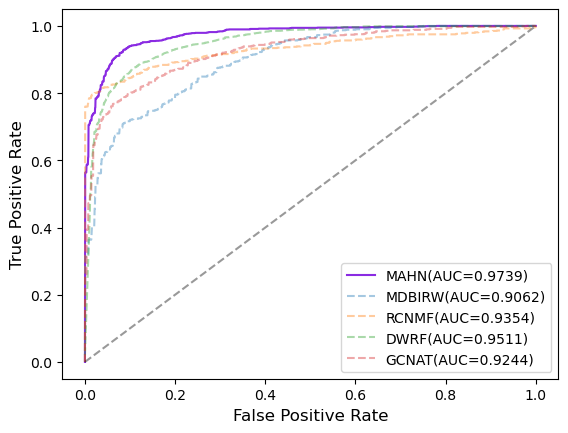

In [6]:
plot_auc_curves(TPR)